<a href="https://colab.research.google.com/github/PawanSingh7266/Netflix_Movies_and_TV_show_clustering_Project_/blob/main/Netflix_Movies_and_TV_show_clustering_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies and TV Shows Clustering**

Project Type - Unsupervised

Contribution - Indivisual

Name - Pawan Singh

# **Project Summary**

With more than 83 million subscribers and presence in more than 190 countries, Netflix is the most popular Internet television network in the world. Its users watch more than 125 million hours of TV and movie content daily, including original series, documentaries, and feature films. On almost any screen that is linked to the Internet, members can watch as much as they want, whenever and wherever. Without interruptions or obligations, members can play, pause, and resume watching at any time.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **GitHub Link -**

# **Problem Statement**

1. Netflix is the world's largest online streaming service provider, with over 220
million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

2. We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

3. The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# Visualizing the missing values
import missingno as msno



# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
# first five rows
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['release_year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['release_year'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['show_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['title'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['director'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['show_id', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_7, *['type', 'title'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_8, *['title', 'director'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_9, *['director', 'cast'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['release_year', 'show_id'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['release_year', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['release_year', 'title'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['release_year', 'director'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['date_added', 'release_year', 'show_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['date_added', 'release_year', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['date_added', 'release_year', 'title'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['date_added', 'release_year', 'director'], **{})
chart

In [ ]:
#Last five rows
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['release_year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['release_year'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_20, *['show_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_21, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_22, *['title'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_23, *['director'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_24, *['show_id', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_25, *['type', 'title'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_26, *['title', 'director'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_27, *['director', 'cast'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_28, *['release_year', 'show_id'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_29, *['release_year', 'type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_30, *['release_year', 'title'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_31, *['release_year', 'director'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_32, *['date_added', 'count()', 'show_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_33, *['date_added', 'count()', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_34, *['date_added', 'count()', 'title'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_35, *['date_added', 'count()', 'director'], **{})
chart

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_value = len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",duplicate_value)

The number of duplicate values in the data set is =  0


We found that there were no duplicate entries in the above data.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the Column: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each Column: ")
print("-"*50)
null_count_by_column = df.isnull().sum()/len(df)
print(f"{null_count_by_column*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the Column: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each Column: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


<Axes: >

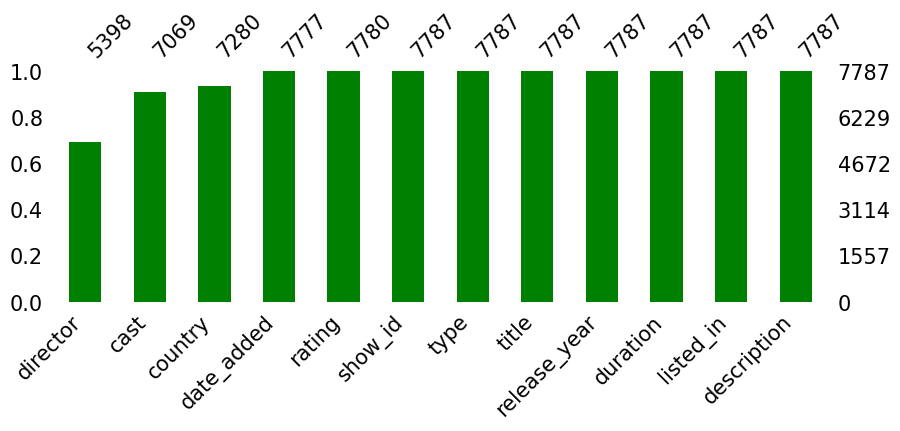

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

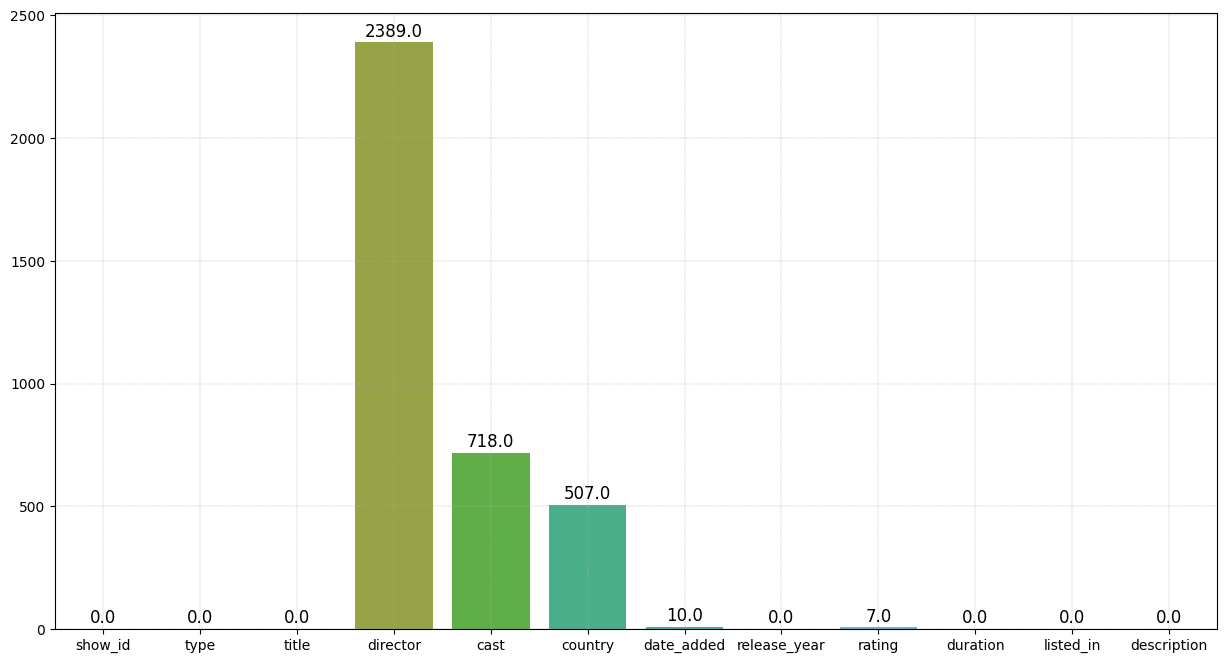

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x = df.columns,y = df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

##### What did you know about your dataset?

The dataset "Netflix Movies and TV Shows Clustering" comprises 12 columns, with only one column having an integer data type. It does not contain any duplicate values, but it does have null values in five columns: director, cast, country, date_added, and rating.

This dataset provides a valuable resource for exploring trends in the range of movies and TV shows available on Netflix. Additionally, it can be utilized for developing clustering models to categorize similar titles together based on shared attributes such as genre, country of origin, and rating.

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
df.describe(include='all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. show_id: Unique identifier for each movie/show.

2. type: Indicates whether the entry is a movie or a TV show.

3. title: Name of the movie or TV show.

4. director: Name of the director(s) of the movie or TV show.

5. cast: Names of the actors and actresses featured in the movie or TV show.

6. country: Country or countries where the movie or TV show was produced.

7. date_added: Date when the movie or TV show was added to Netflix.

8. release_year: Year when the movie or TV show was released.

9. rating: TV rating or movie rating of the movie or TV show.

10. duration: Length of the movie or TV show in minutes or seasons.

11. listed_in: Categories or genres of the movie or TV show.

12. description: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is", df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## **3. Data Wrangling**

### Data Wrangling Code

#### Handling Null values from each feature

In [4]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the column: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_column = df.isnull().sum()/len(df)
print(f"{null_count_by_column*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the column: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


In [5]:
df["date_added"].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [6]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [7]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

1. Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.

2. We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.

3. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [8]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']] = df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [9]:
# Rechecking the Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the column: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null values in each column: ")
print("-"*50)
null_count_by_column = df.isnull().sum()/len(df)
print(f"{null_count_by_column*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the column: 
--------------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
--------------------------------------------------
Percentage of null values in each column: 
--------------------------------------------------
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64%
--------------------------------------------------


#### Country & Listed_in -

In [10]:
# Top countries
df.country.value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [11]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [12]:
# Find entries with multiple countries
multiple_countries = df[df['country'].str.contains(',', na=False)]

# Find entries with multiple genres
multiple_genres = df[df['listed_in'].str.contains(',', na=False)]

# Print movies/TV shows with multiple countries
print("Movies/TV Shows Filmed in Multiple Countries:")
print(multiple_countries[['title', 'country']])

# Print movies/TV shows with multiple genres
print("\nMovies/TV Shows with Multiple Genres:")
print(multiple_genres[['title', 'listed_in']])


Movies/TV Shows Filmed in Multiple Countries:
                                        title  \
11                                       1983   
17                                     22-Jul   
48                        10 Days in Sun City   
50                                10,000 B.C.   
54                                 100 Meters   
...                                       ...   
7759                                Zak Storm   
7761                                   Zapped   
7770                                  Zinzana   
7782                                     Zozo   
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                country  
11                                Poland, United States  
17                       Norway, Iceland, United States  
48                                South Africa, Nigeria  
50                          United States, South Africa  
54                                      Portugal, Spain  
...              

To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed. Also, let's consider only the primary genre of the respective movie / TV show.

In [13]:
# Function to extract the primary value
def extract_primary(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value

# Apply the function to 'country' and 'listed_in' columns
df['country'] = df['country'].apply(extract_primary)
df['listed_in'] = df['listed_in'].apply(extract_primary)

# Print the DataFrame with simplified values
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

             country          date_added  release_year rating   duration  \
0             Brazil     August 14, 2020          2020  TV-MA  4 Seasons   
1             Mexico   December 23, 2016          2016  TV-MA     93 min   
2          Singapore   December 20, 2018          2011      R     78 min   
3      United States   November 16, 2017          2009  PG-13     80 min   
4      United States     January 1, 2020          2008  PG-13    123 min   
...              ...                 ...           ...    ...        ...   
7782          Sweden    October 19, 2020          2005  TV-MA     99 min   
7783           India       March 2, 2019          2015  TV-14    111 min   
7784   United States  September 25, 2020          2019  TV-MA     44 min   
7785       Australia    October 31, 2020          2019  TV-PG   1 Season   
7786  United Kingdom       March 1, 2020          2019  TV-MA     90 min   

                   listed_in  \
0     International TV Shows   
1                     Dramas   
2              Horror Movies   
3         Action & Adventure   
4                     Dramas   
...                      ...   
7782                  Dramas   
7783                  Dramas   
7784           Documentaries   
7785  International TV Shows   
7786           Documentaries   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  

[7770 rows x 12 columns]

#### date_added-

In [14]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [15]:
# first and last date on which a show was added on Netflix
df.date_added.min(), df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [16]:
# Adding new attributes day,  month and year of date added
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

#### Rating -

<Axes: xlabel='rating', ylabel='count'>

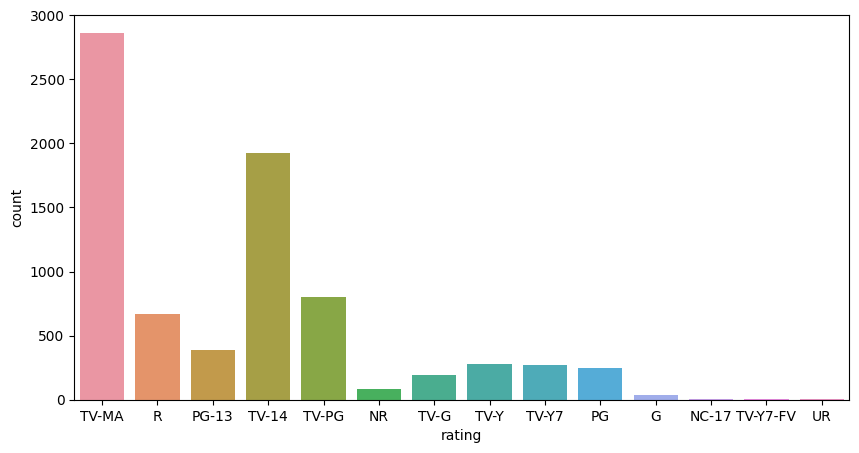

In [17]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data = df)

**Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG**

In [18]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [19]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

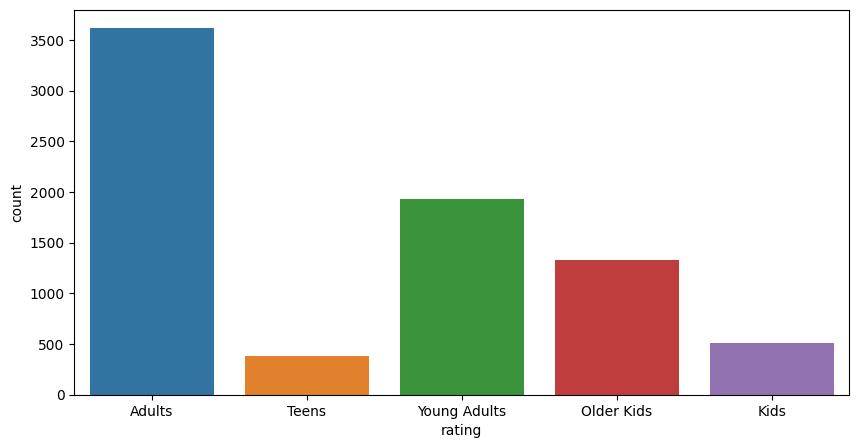

In [20]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data = df)

#### Duration -

In [21]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [22]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1606
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [23]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101, 113, 114, 130,  94,
       140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,  96,
       126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,  29,
       142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57, 150,
       133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,  38,
        25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,  42,
        79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,  48,
       139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165, 166,
       138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,  14,
       177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200, 169,
        27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13, 214,
        17, 173, 192, 209, 187,  41, 182, 224,  37, 233, 189, 15

In [24]:
# datatype of duration
df.duration.dtype

dtype('int64')

### What all manipulations have you done and insights you found?

There are 12 attributes out of which some attributes are not in proper datatypes like date_added and duration so we apply some method to convert them in desired datatype. after which we get to know that in type feature there is more movies in comparison of tv shows. we generate cloud word image to get know about common words that occured most in title. There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it so we focus only primary country and primary genre for that type. Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG so we change rating according to view preference like adults, teens, older kids etc and we found that Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Chart - 1: Analyze the type of content available on Netflix.

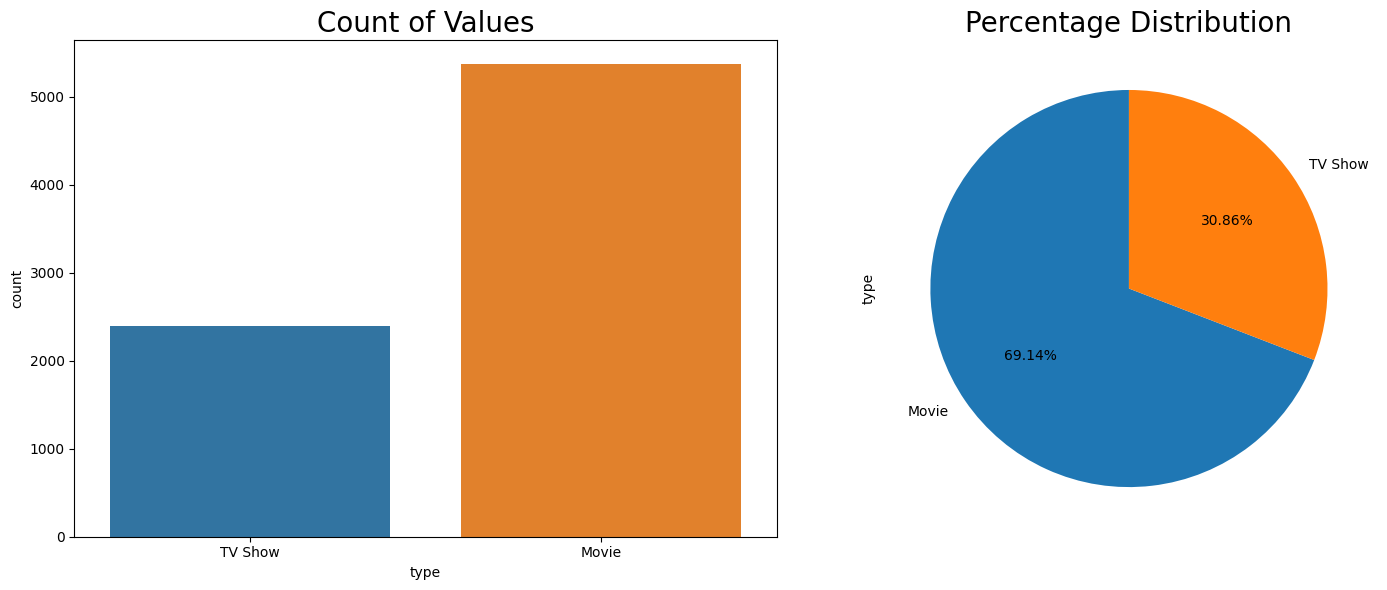

In [26]:
# Chart - 1 visualization code

fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x = 'type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

we've chosen a countplot to show the exact counts of "Movies" and "TV Shows." This gives a clear comparison of how many of each type of content is in our dataset. Additionally, we've chosen a pie chart to show the percentage distribution of these content types, which allows us to see the proportion of movies and TV shows in the whole dataset.

#### 2. What is/are the insight(s) found from the chart?

The majority of the content available on Netflix is in the form of "Movies."


"TV Shows" constitute a smaller portion of the overall content on the platform.

The pie chart provides a clear visual representation of the distribution, with "Movies" taking up a larger portion of the whole.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Content Strategy: The insight that a larger portion of the content consists of "Movies" suggests that movies are more prevalent on the platform. This could inform content acquisition and production strategies, allowing Netflix to focus on obtaining popular and diverse movie titles to cater to a wider audience.

User Engagement: Understanding that "Movies" dominate the content catalog can help Netflix tailor its marketing and user engagement strategies. This insight could lead to targeted promotional campaigns for specific genres, leveraging the popularity of movies to attract and retain subscribers.

Retention Strategies: By knowing that movies are more abundant, Netflix can create customized recommendations and curated collections to enhance user engagement and satisfaction. Providing users with relevant movie suggestions could lead to increased usage and longer subscription durations.

**Negative Growth Insights:**

The provided visualizations do not directly indicate any insights that would lead to negative growth. However, it's important to note that the lack of "TV Shows" might imply a potential gap in certain content areas:

Diversity of Content: If the available "TV Shows" are limited in number or variety, there could be negative implications for subscribers who prefer TV series. They might find the content offerings lacking, potentially leading to lower satisfaction or churn.

Market Competitiveness: If competitors are offering a broader range of TV shows, Netflix might face challenges in attracting users who are specifically seeking TV series content. This could impact their market share.

Subscription Tier Optimization: Depending on user preferences, Netflix might need to optimize its subscription tiers. If users primarily prefer TV shows, they might expect more options in lower-cost tiers, which could affect the perceived value of subscriptions.

### Chart - 2: top 10 countries in content creation.

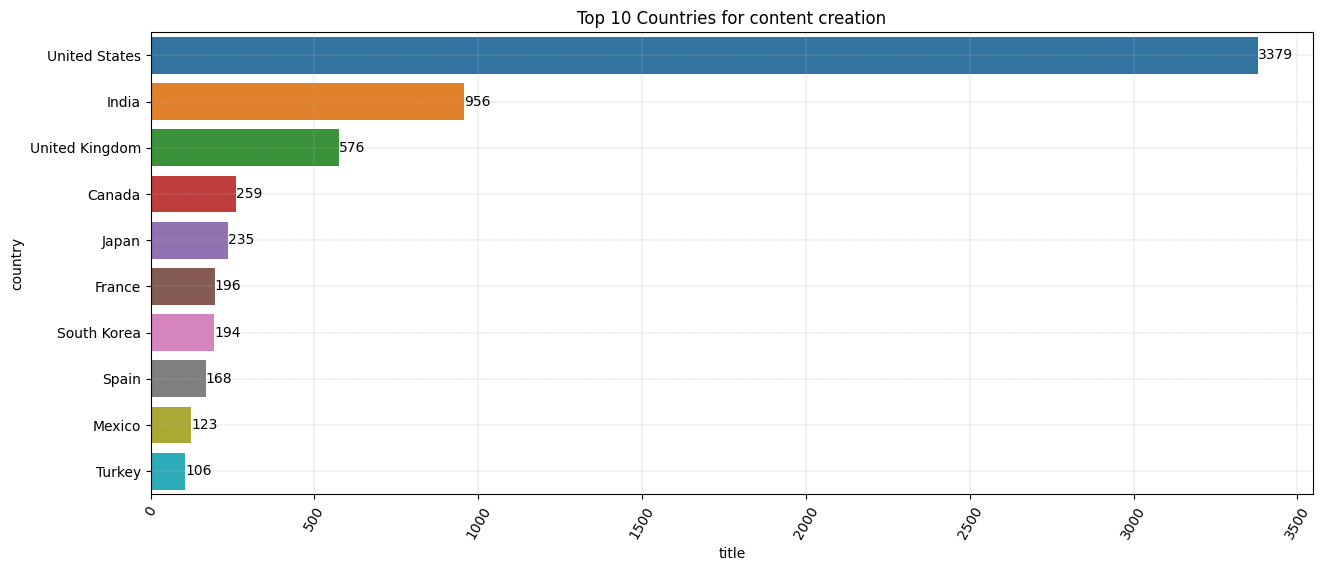

In [27]:
# Chart - 2 visualization code

df_country = df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

#### 1. Why did you pick the specific chart?

The reason to choose a bar plot in this context is that it effectively visualizes the distribution of categorical data, which in this case is the primary filming country. Here's why a bar plot is appropriate:

Categorical Data: The primary filming country is a categorical variable, and a bar plot is a common choice for visualizing the distribution of categorical data. Each country is represented by a separate bar, making it easy to compare the counts of shows for different countries.

Comparison: A bar plot allows you to quickly identify and compare the countries with the highest number of shows. The lengths of the bars provide a clear visual representation of the frequency of shows from each country.

#### 2. What is/are the insight(s) found from the chart?

The output of the top countries with the highest number of shows provides valuable insights into the distribution of content on Netflix based on primary filming countries. Here are some insights we can gain from this information:

Content Production Leaders: The United States has a significant lead with the highest number of shows, indicating that it's a major contributor to Netflix's content library. This could be attributed to the presence of a robust entertainment industry in the U.S.

Global Diversity: Countries like India, the United Kingdom, Canada, and Japan also have a substantial number of shows. This suggests a diverse range of content from various parts of the world, catering to different viewer preferences and cultures.

Language and Localization: The presence of shows from different countries highlights Netflix's efforts to offer content in multiple languages and localize content for global audiences. This diversity can help attract and retain a broader subscriber base.

Regional Appeal: Countries like South Korea, Spain, and Mexico are notable contributors, indicating the popularity of content from these regions. This could reflect a growing interest in international content and a willingness to explore shows from different cultures.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Global Market Expansion: The insights highlight that Netflix has a diverse content library spanning various countries. This can attract a global audience, leading to positive growth by expanding its subscriber base in different regions.

Localized Content: Understanding the top contributing countries allows Netflix to focus on creating and acquiring content that resonates with specific markets. This localization strategy can lead to higher engagement and viewer satisfaction.

Cultural Relevance: Content from different countries provides opportunities to cater to cultural and regional preferences. This can foster a sense of inclusivity and connect with viewers on a deeper level.

**Potential Challenges and Negative Impact:**

Market Saturation: Relying heavily on content from a few countries, particularly the United States, might lead to market saturation. Overwhelming viewers with content from a single region can limit appeal to a broader global audience.

Cultural Misalignment: While localization is beneficial, there's a risk of cultural misalignment if content is not adapted accurately. Insensitive content can lead to negative backlash and viewer attrition.

Competition and Differentiation: If other streaming platforms offer unique content from underrepresented regions, Netflix might face competition for viewership. Lack of diversity could hinder differentiation.



### Chart - 3: content growth over the years?

In [28]:
# Chart - 3 visualization code


# Filter data by type (TV Show or Movie)
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

# Count content added each year for TV Shows and Movies
content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns={col: "count", "index": col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns={col: "count", "index": col})
content_2 = content_2.sort_values(col)

# Create traces for TV Shows and Movies
trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(
    title="Content Added Over the Years",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Count"),
    legend=dict(x=0.4, y=1.1, orientation="h")
)
fig = go.Figure(data, layout=layout)

# Display the figure (if using show)
fig.show()


#### 1. Why did you pick the specific chart?

The choice of chart in the code you provided is a line chart (specifically, a scatter plot with connected lines) to visualize the growth of content (TV shows and movies) over the years. Here's why this choice of chart might be suitable:

Temporal Data: The x-axis represents years, which is a continuous variable and can be effectively shown using a line chart. Line charts are often used to display trends over time.

Comparison: The line chart allows you to compare the growth of TV shows and movies side by side. Each line represents a content type, making it easy to observe the trends and differences.

Connected Data Points: In your code, you've used a scatter plot with connected lines. This is a good choice when you have discrete data points (years) but still want to show the trend between them.

#### 2. What is/are the insight(s) found from the chart?

**TV Shows:**

There was a small amount of TV show content added in the early years (2008 to 2010), possibly indicating the beginning of Netflix's original content creation.
A notable increase in TV show additions started around 2015, which continued to grow in the subsequent years.
The highest growth in TV show content occurred from 2016 to 2020, with a peak of 697 TV shows added in 2020.
There seems to be a significant drop in TV show additions in 2021 compared to the previous years.

**Movies:**

Similar to TV shows, the earliest years (2008 to 2010) saw a relatively small number of movie additions.
There's a noticeable increase in movie additions starting from 2014, with a more significant rise in 2016.
The growth trend continues from 2016 to 2019, with the highest number of movies (1497) added in 2019.
Movie additions show a slight decline in 2020, followed by a relatively higher number of additions in 2021.

**Overall Insights:**

Both TV shows and movies exhibit a growth trend over the years, with significant expansion starting around 2015-2016.
The years 2018 and 2019 appear to be particularly active in terms of content additions for both TV shows and movies.
The drop in content additions in 2020 might be attributed to factors like production delays caused by the COVID-19 pandemic.
The lower number of additions in 2021 for both TV shows and movies could indicate a potential shift in strategy or the impact of ongoing circumstances.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Strategic Decision-Making: The insights into the years of significant growth (such as 2018-2019) can help Netflix understand what strategies, content acquisitions, or original productions were successful during those periods. This information can guide future decision-making to replicate and build upon those successes.

Content Investment: Identifying trends in content growth can help Netflix allocate resources more effectively. For instance, if TV shows have shown consistent growth, Netflix might choose to invest more in producing and acquiring TV show content, targeting genres and themes that have proven popular.

**Potential Negative Impact:**

Decline in Content Additions: The drop in content additions in 2021, both for TV shows and movies, could potentially lead to a decrease in subscriber engagement and retention. Users often expect a steady stream of fresh content, and a sudden drop could result in dissatisfaction.

Competition and Variety: The consistent growth in content could lead to oversaturation and reduced audience engagement if the content quality or variety isn't maintained. Users may become overwhelmed with choices, and competitors might offer content that better aligns with specific tastes.

### Chart - 4: In which month do most movies and tv shows get added on netflix?

In [29]:
# Chart - 4 visualization code


# Create dataframe to store month values and counts.
months_df = pd.DataFrame(df.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)
fig.show()


#### 1. Why did you pick the specific chart?

the bar chart is an appropriate choice for this visualization because it effectively displays the distribution of content additions across months and allows for easy comparison and interpretation of the data.

#### 2. What is/are the insight(s) found from the chart?

High-Volume Months: The months with the highest content additions are December (833), October (785), and January (757). These months seem to be particularly active in terms of adding new content to the platform.

End-of-Year Peaks: December stands out as the month with the highest content additions. This could be related to the holiday season, where more people might be engaged in streaming and the platform might want to provide a variety of content choices.

Release Patterns: The top months for content additions (December, October, January) might correspond to popular times for content releases, aligning with holidays, school breaks, or other cultural events.

Mid-Year Dips: Months like May (543) and June (542) show relatively lower content additions. This could be due to factors like production schedules, vacation periods, or a focus on promoting existing content.


#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Strategic Content Releases: The insights into high-volume months (such as December, October, and January) can be leveraged for strategic content releases. By concentrating major releases during these months, Netflix can maximize viewer engagement and subscriptions, leading to positive business impact.

Subscriber Engagement: Releasing content during months of higher user engagement can enhance user satisfaction and encourage longer subscriptions. Users are more likely to stay engaged when they have a variety of new content options.

Marketing Campaigns: The months with higher content additions can be targeted for marketing campaigns to highlight the availability of new and exciting content. This can attract both new subscribers and existing ones.

**Potential Negative Impact:**

Content Oversaturation: Focusing too heavily on high-volume months could lead to content oversaturation during those periods. This might result in users feeling overwhelmed by the choices and potentially not fully engaging with the content.

Neglecting Low-Volume Months: Overemphasizing high-volume months could lead to neglecting low-volume months. If users experience a lack of new content during these months, they might become dissatisfied and consider canceling subscriptions.

Unpredictable Viewer Behavior: While the insights show trends, viewer behavior can be unpredictable. Relying solely on high-volume months might not fully capture the diverse preferences and viewing habits of all subscribers.

### Chart - 5: Which days are more prominent?

In [30]:
# Chart - 5 visualization code

# Create dataframe to store day values and count.
days_df = pd.DataFrame(df.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

fig = px.bar(days_df, x="day", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Which days are more prominent',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=600)
fig.show()


#### 1. Why did you pick the specific chart?

the bar chart is a suitable choice for this visualization because it effectively displays the distribution of content additions across days of the week and allows for easy comparison and interpretation of the data.

#### 2. What is/are the insight(s) found from the chart?

Weekdays Dominate: Weekdays (days 1 to 5) have significantly higher content additions compared to weekends (days 6 and 7). This suggests that content is added more frequently during weekdays.

Day 1 Peak: day 1 has the highest count of content additions (2069). This suggests a potential trend of adding new content at the beginning of the week.

Mid-Month Peaks: Days around the 15th of the month (days 15 and 16) have relatively high content additions (644 and 240, respectively). This could indicate a trend of content additions around the middle of the month.

End-of-Month Surges: Days at the end of the month (days 31, 30, and 31) also show relatively higher content additions (274, 182, and 130, respectively). This could be related to content releases before the end of the month.

Variation on Weekends: Days 6 and 7 (Saturday and Sunday) have lower content additions (165 and 162, respectively), suggesting a potential strategy of focusing less on weekends.

Consistency in Numbers: Days in the mid-range (days 18 to 28) show consistent content additions, indicating a steady flow of new content throughout the month.

### Chart - 6: top 10 and last 10 genre present in listed in.

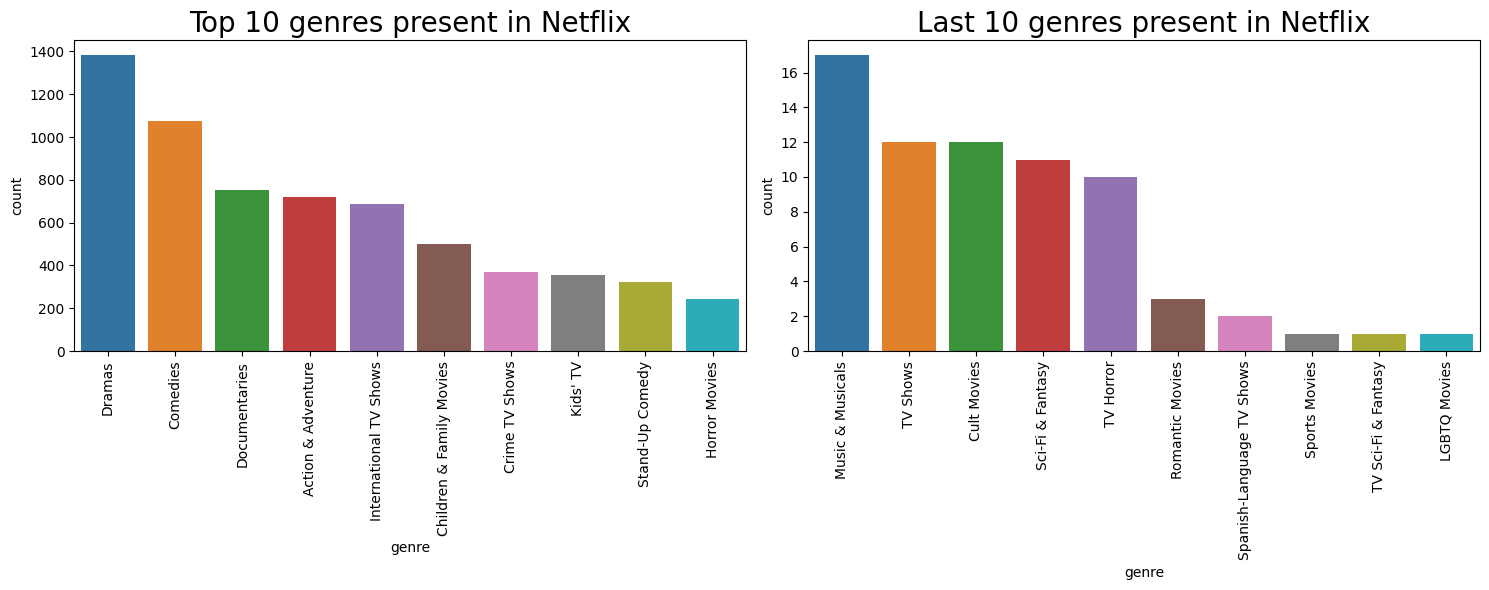

In [31]:
# Chart - 6 visualization code


# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()
# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x = 'genre', y = 'count', data = genres[:10], ax = ax[0])
top.set_title('Top 10 genres present in Netflix', size = 20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x = 'genre', y = 'count', data = genres[-10:], ax = ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### 1. Why did you pick the specific chart?

The choice of using a bar plot (bar chart) in the provided code is appropriate for visualizing the distribution of genres in the "listed_in" column of the Netflix dataset. Here's why a bar plot is a suitable choice for this visualization:

Categorical Data: The genres extracted from the "listed_in" column are categorical data. A bar plot is commonly used to represent the distribution of categorical data.

Comparison: Bar plots are ideal for comparing the frequency or count of different categories. In this case, you're comparing the count of each genre.

#### 2. What is/are the insight(s) found from the chart?

Diverse Genre Offerings: The top genres include a variety of content, ranging from dramas, comedies, documentaries, and action & adventure. This diversity reflects Netflix's efforts to cater to a wide range of viewer preferences.

Mainstream Appeal: Genres like dramas, comedies, and documentaries have a high count, indicating their popularity and mainstream appeal among viewers.

Global Audience: The presence of "International TV Shows" in the top genres suggests that Netflix has a strong focus on providing content from various countries, appealing to a global audience.

Niche and Specialized Content: The genres in the last 10 list, such as "Cult Movies," "TV Horror," and "Sci-Fi & Fantasy," tend to be more specialized and might cater to niche audiences.

Limited Appeal: Genres with lower counts, such as "LGBTQ Movies," "Sports Movies," and "Spanish-Language TV Shows," suggest that these genres might have limited appeal compared to more mainstream genres.

Highly Specific Content: The genres "TV Sci-Fi & Fantasy" and "TV Horror" are specific subgenres that might cater to fans of these particular genres.

Limited Availability: Some genres with very low counts (e.g., "Sports Movies") might indicate that Netflix offers limited content within those genres.

### Chart - 7: Number of shows/movies on Netflix for different age groups.

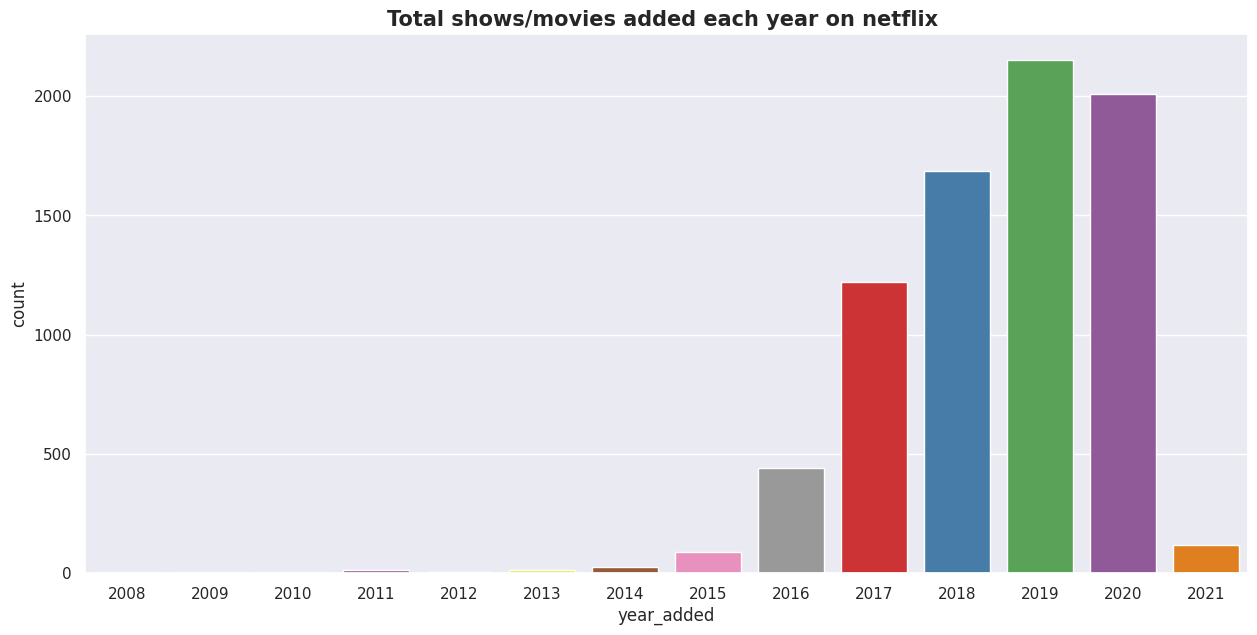

In [32]:
# Chart - 7 visualization code

sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x = 'year_added',data = df,palette = "Set1")

plt.title('Total shows/movies added each year on netflix ',size = '15',fontweight = "bold")
plt.show()


#### 1. Why did you pick the specific chart?

the countplot is a suitable choice for visualizing the distribution of shows/movies added to Netflix each year. It effectively presents the frequency of content additions for each year and enables easy comparison and interpretation of the data.

#### 2. What is/are the insight(s) found from the chart?

Rapid Growth in Recent Years: The years 2019 and 2020 saw the highest numbers of content additions, with 2153 and 2009 shows/movies added, respectively. This indicates a period of rapid growth for Netflix's content library in recent years.

Continued Expansion: Following 2019 and 2020, the year 2018 also had a substantial number of content additions, with 1685 shows/movies added. This suggests that Netflix's content expansion efforts have been consistent over multiple years.

Steady Growth: The years 2017 and 2016 also had significant numbers of content additions, with 1225 and 443 shows/movies added, respectively. This indicates steady growth in Netflix's content library during those years.

Recent Decline: In 2021, the number of content additions dropped to 117 shows/movies. While this could indicate a slowdown, it's important to note that the data might not be complete for the entire year, and trends can change throughout the year.

Early Years: The years 2014 and earlier had lower numbers of content additions, suggesting that Netflix's content library was smaller in its early years of operation.

### Chart - 8: Rating based on rating system of all TV Shows and movies?

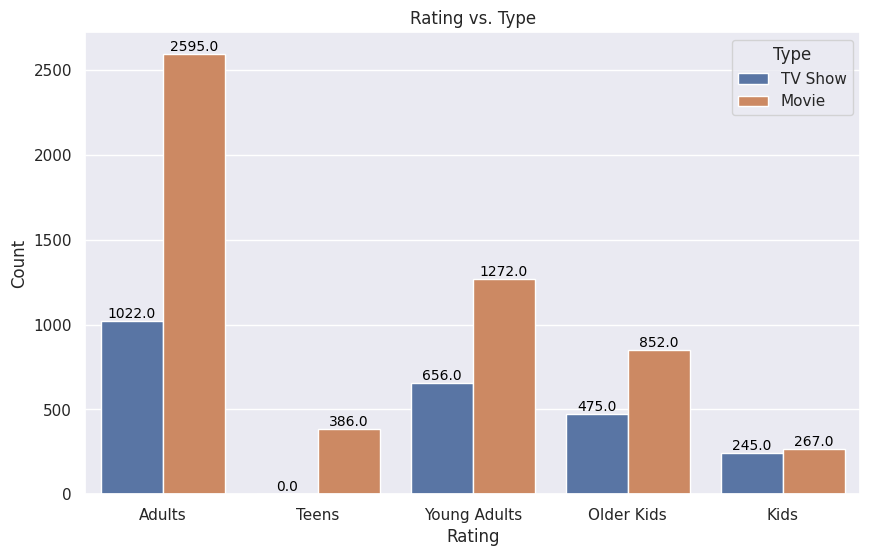

In [33]:
# Chart - 8 visualization code

# Rating vs. Type (Grouped bar chart)
plt.figure(figsize = (10, 6))
sns.countplot(x = "rating", hue = "type", data = df)
plt.title("Rating vs. Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title = "Type")

# Print count values on the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', fontsize = 10, color = 'black', xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

#### 1. Why did you pick the specific chart?

The countplot is a type of bar plot that is specifically designed to show the count of occurrences of a categorical variable. It is particularly useful when you want to visualize the distribution of categorical data and compare the frequency of different categories.

#### 2. What is/are the insight(s) found from the chart?

For the "Adults" rating, there are significantly more movies (2595) compared to TV shows (1025). However, for the "Teens" rating, there are only movies (386) and no TV shows.

The "Young Adults" rating has a relatively balanced distribution between movies (1272) and TV shows (659), indicating a diverse range of content for this category.

For the "Older Kids" and "Kids" ratings, there are more movies than TV shows, with "Older Kids" having 852 movies and 478 TV shows, and "Kids" having 267 movies and 246 TV shows.

### Chart - 9: Season-wise distribution of tv shows.

In [34]:
# Chart - 9 visualization code

tv_df = df[df['type']=='TV Show']
tv_df['duration'].value_counts()

tv = tv_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv,values = 'duration',names = 'index',color_discrete_sequence = px.colors.sequential.Greens)
fig.update_layout(title = "season-wise distribution of tv shows")
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', textfont_size = 20,
                  marker = dict( line = dict(color = 'RebeccaPurple', width = 2)))

#### 1. Why did you pick the specific chart?

a pie chart is a suitable choice for visualizing the distribution of TV shows on Netflix based on the number of seasons. It effectively conveys the proportion of TV shows within each season category and allows viewers to compare these proportions visually.

#### 2. What is/are the insight(s) found from the chart?

Diverse Content Strategy: Netflix has a diverse content strategy that includes a mix of single-season shows and multi-season shows. This strategy allows them to cater to a wide range of viewer preferences and consumption habits.

Emphasis on Shorter Formats: The dominance of single-season shows suggests that Netflix invests in producing shorter formats like mini-series and limited series. These formats might be more appealing to viewers who prefer concise storytelling.

Variety in Multi-Season Shows: The presence of multi-season shows in different ranges (2-3, 4-6, etc.) indicates that Netflix offers a variety of ongoing series and shows that explore longer story arcs.

Viewer Engagement with Long-Running Shows: Although rare, the presence of TV shows with higher numbers of seasons suggests that there are shows on Netflix that have managed to maintain viewer engagement over a significant period.


### Chart - 10: Top 10 Directors directed in Movies and TV Shows

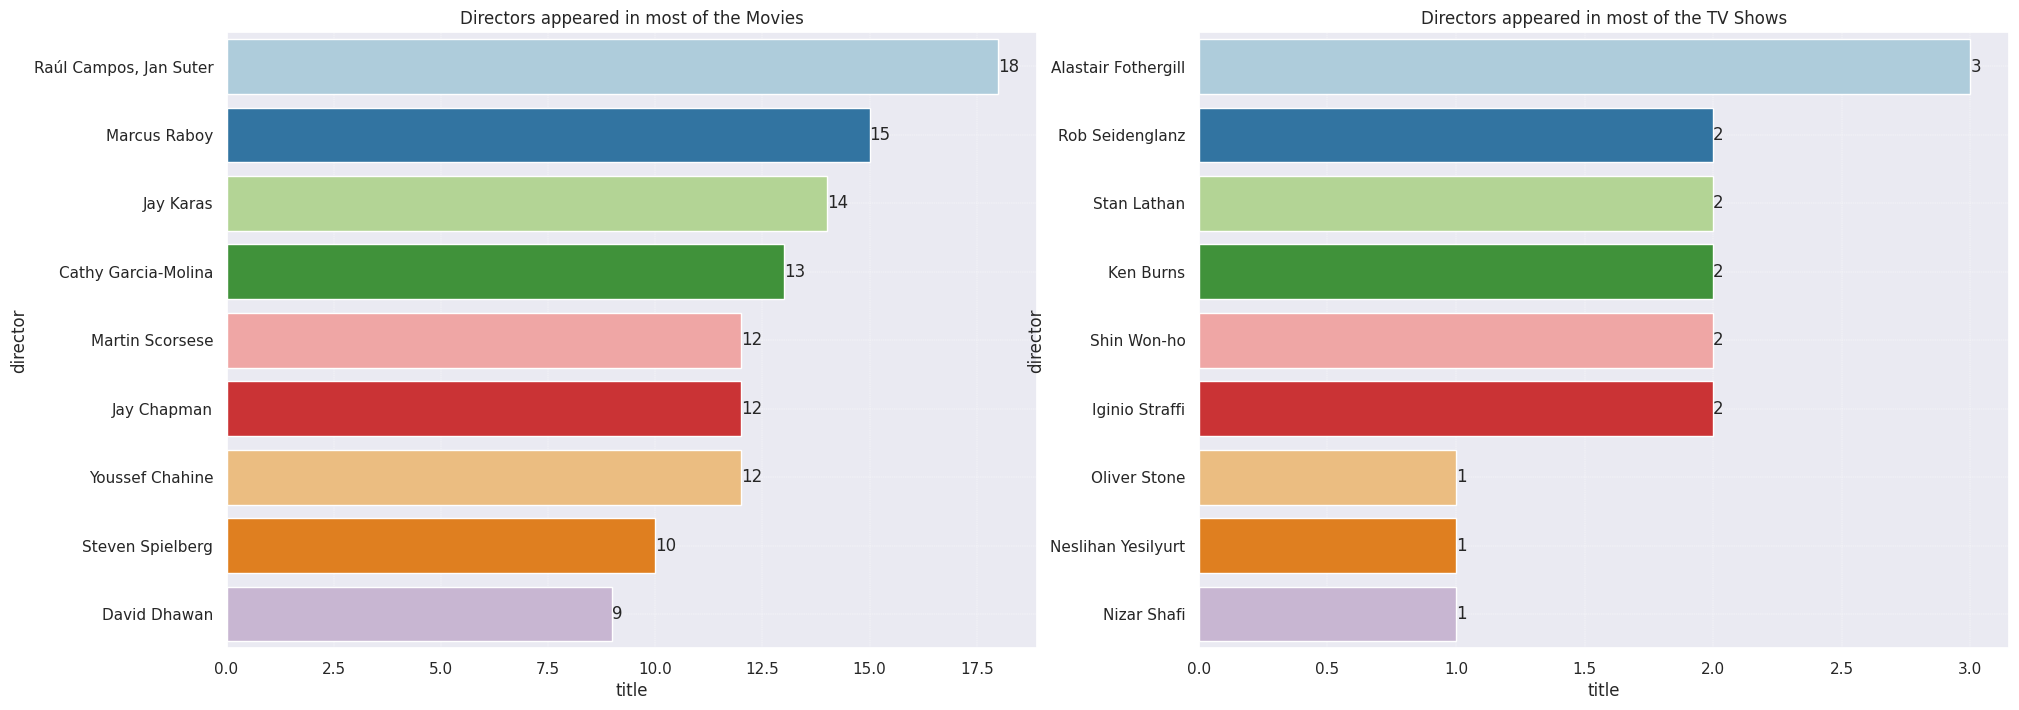

In [35]:
# Chart - 10 visualization code
# Top 10 Directors in Movies and TV Shows
df_movies = df[df['type']== 'Movie']
df_tvshows = df[df['type']== 'TV Show']
plt.figure(figsize = (23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending = False)[1:10]
  plots= sns.barplot(y = "director",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

#### 1. Why did you pick the specific chart?

the horizontal bar chart with subplots is a visually effective way to compare and contrast the top directors in both TV shows and movies, offering insights into their contributions to Netflix's content library across different categories.

#### 2. What is/are the insight(s) found from the chart?

Diverse Directorship: The top directors for TV shows vary in terms of the number of shows directed. The highest count is 3 shows directed by Alastair Fothergill, while others have directed 2 shows each.

Variety in Content: The variety in the names of the top TV show directors suggests that there isn't a single director who dominates the TV show category. This indicates a diverse range of directors contributing to Netflix's TV show offerings.

Documentaries and Series: Directors like Alastair Fothergill and Ken Burns are known for documentaries, which might be contributing to their high directorship counts.

Highly Prolific Directors: The top directors for movies have directed a significant number of films. Raúl Campos and Jan Suter have directed the highest count of 18 movies, followed closely by directors like Marcus Raboy and Jay Karas.

Comedy and Stand-Up: Directors like Marcus Raboy, Jay Karas, and Jay Chapman are known for directing comedy content, including stand-up specials.

Diverse Genres: The presence of directors like Cathy Garcia-Molina and Youssef Chahine suggests a diverse range of movie genres, potentially including romance, drama, and international films.

### Chart - 11: top 10 actors in tv shows/movies.

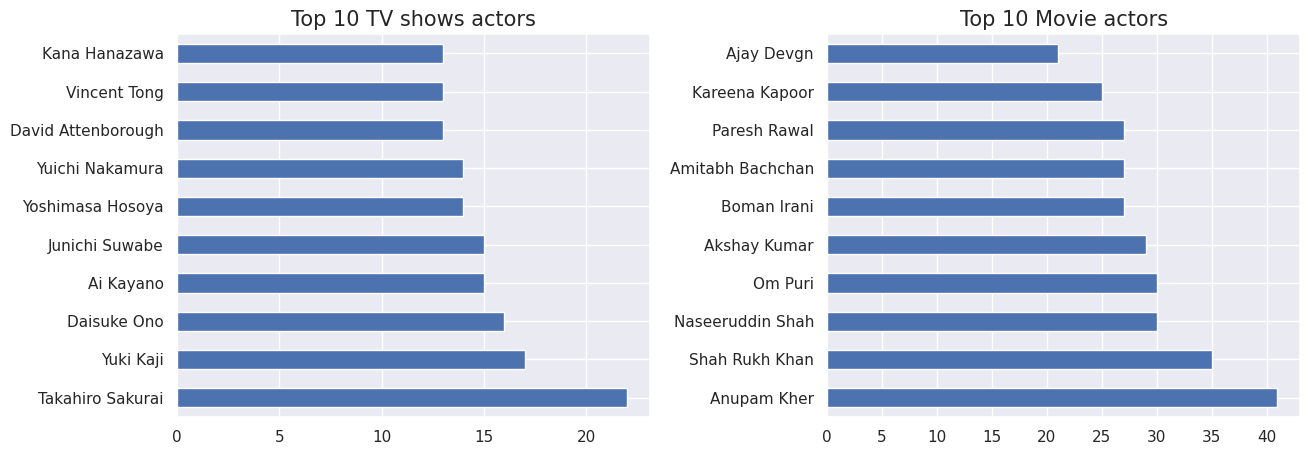

In [36]:
# Chart - 11 visualization code

# Filter out rows with 'unknown' cast entries
filtered_netflix_df = df[~df['cast'].str.contains('unknown', case = False, na = False)]
fig,ax = plt.subplots(1,2, figsize = (14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = filtered_netflix_df[filtered_netflix_df['type']=='TV Show']['cast'].str.split(', ', expand = True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind = 'barh', ax = ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = filtered_netflix_df[filtered_netflix_df['type']=='Movie']['cast'].str.split(', ', expand = True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind = 'barh', ax = ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad = 1.2, rect = [0, 0, 0.95, 0.95])
plt.show()

#### 1. Why did you pick the specific chart?

the horizontal bar chart with subplots is a visually effective way to compare and contrast the top actors in both TV shows and movies on Netflix, providing insights into their level of engagement and popularity in each category.

#### 2. What is/are the insight(s) found from the chart?

Japanese Voice Actors: The presence of Japanese voice actors like Takahiro Sakurai, Yuki Kaji, Daisuke Ono, and Ai Kayano among the top TV show actors suggests that anime content is well-represented on Netflix.

Dubbed Content: The high number of appearances by these voice actors could indicate the popularity of dubbed anime content on the platform.

Frequent Collaborations: Junichi Suwabe, Yoshimasa Hosoya, and Yuichi Nakamura are among the top actors, indicating frequent collaborations with the platform or consistent roles in TV shows.

Bollywood Dominance: The list of top movie actors is dominated by Bollywood stars like Shah Rukh Khan, Akshay Kumar, and Amitabh Bachchan. This suggests a strong presence of Indian cinema on Netflix.

Indian Cinema Showcase: The high counts for actors like Anupam Kher, Om Puri, Naseeruddin Shah, and Paresh Rawal highlight the platform's focus on showcasing classic and contemporary Indian cinema.

Versatile Actors: These actors have appeared in a variety of genres, showcasing their versatility in Indian cinema.

### Chart - 12: Total number of Movies/TV Shows released and added per year on Netflix?


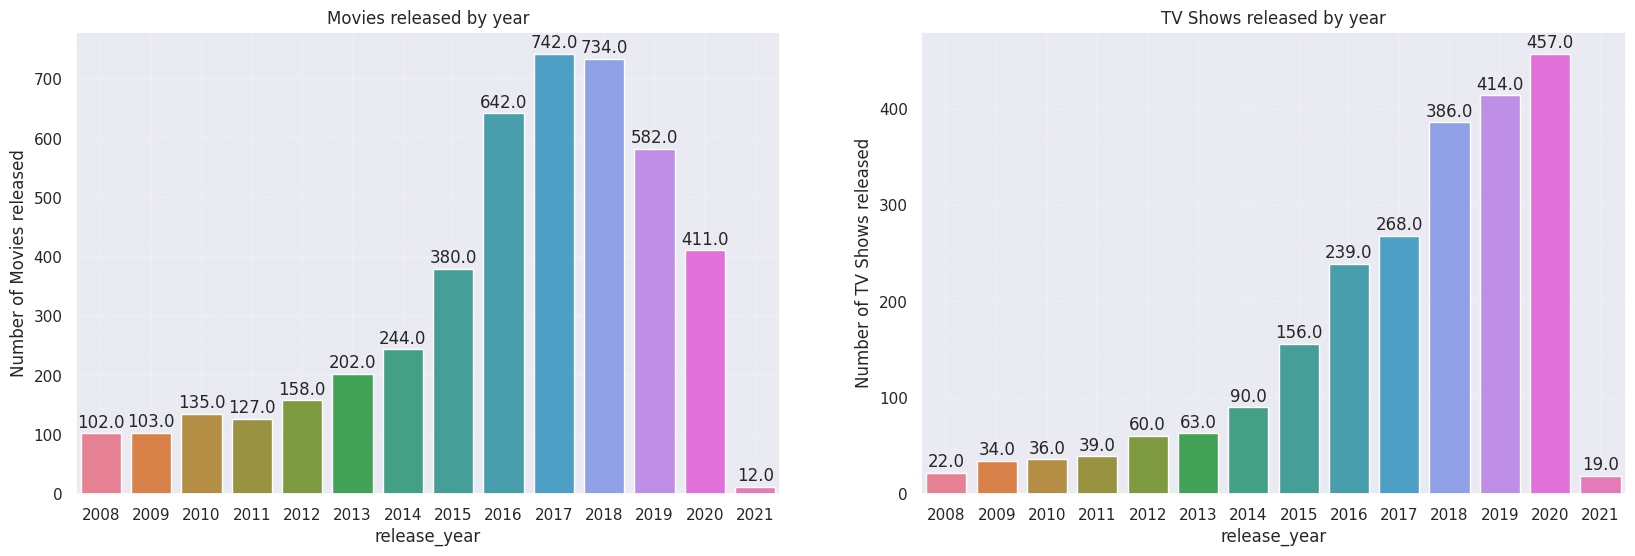

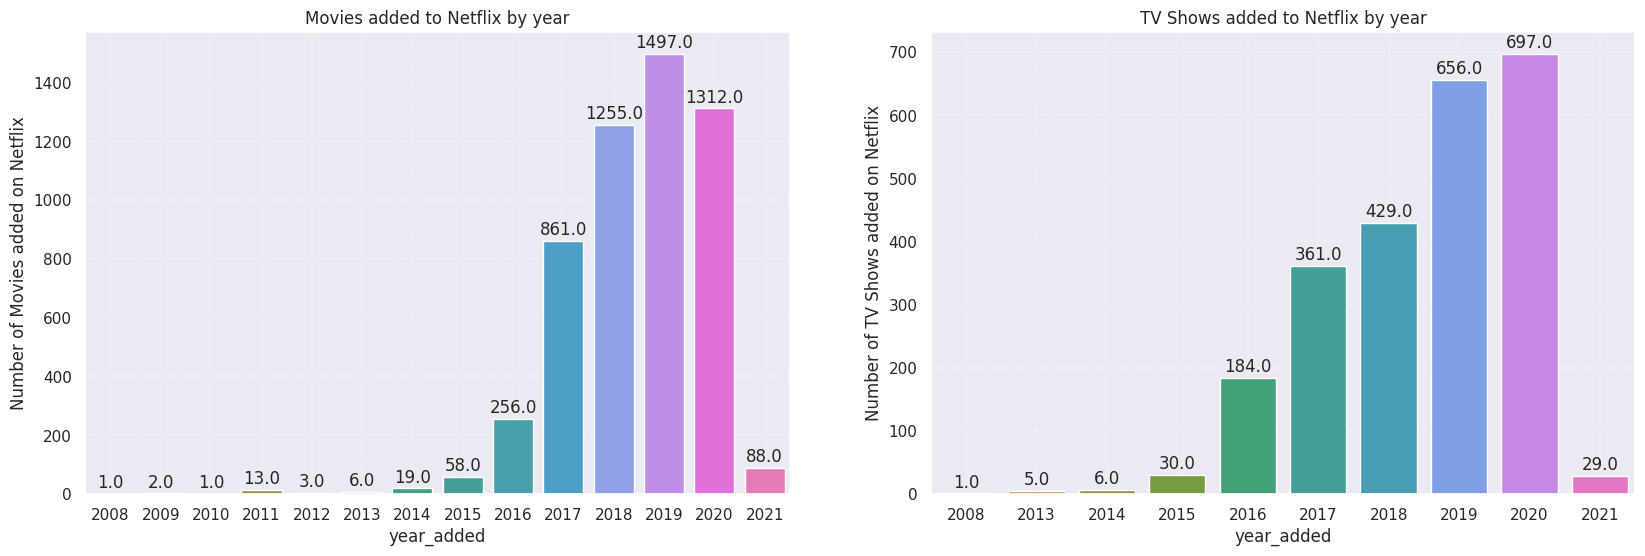

In [37]:
# Chart - 12 visualization code

plt.figure(figsize = (20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by = ['release_year'],ascending = False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va = 'center',
                    size = 12, xytext = (0, 8),
                    textcoords = 'offset points')
plt.show()

plt.figure(figsize = (20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by = ['year_added'],ascending = False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va = 'center',
                    size = 12, xytext = (0, 8),
                    textcoords = 'offset points')
plt.show()

#### 1. Why did you pick the specific chart?

Together, the histogram and countplot provide a comprehensive view of the distribution of content release years and the composition of content types over time. They allow for easy comparison, identification of patterns, and the extraction of meaningful insights about Netflix's content strategy and audience preferences.

#### 2. What is/are the insight(s) found from the chart?

The output provides a list of release years along with the corresponding counts of content released in each year.

The years with the highest number of content releases are concentrated in the recent years, particularly from 2016 to 2020, for both TV shows and movies.

There's a clear trend of increasing content production in recent years, which is likely influenced by the rise of streaming platforms and original content creation.

The output shows the number of TV shows released in the top 15 years.

The highest number of TV shows were released in the year 2020, followed closely by 2019 and 2018. This suggests that recent years have seen a surge in TV show releases.

### Chart - 13: Which Countries has the highest spread of Movies and TV Shows over Netflix?

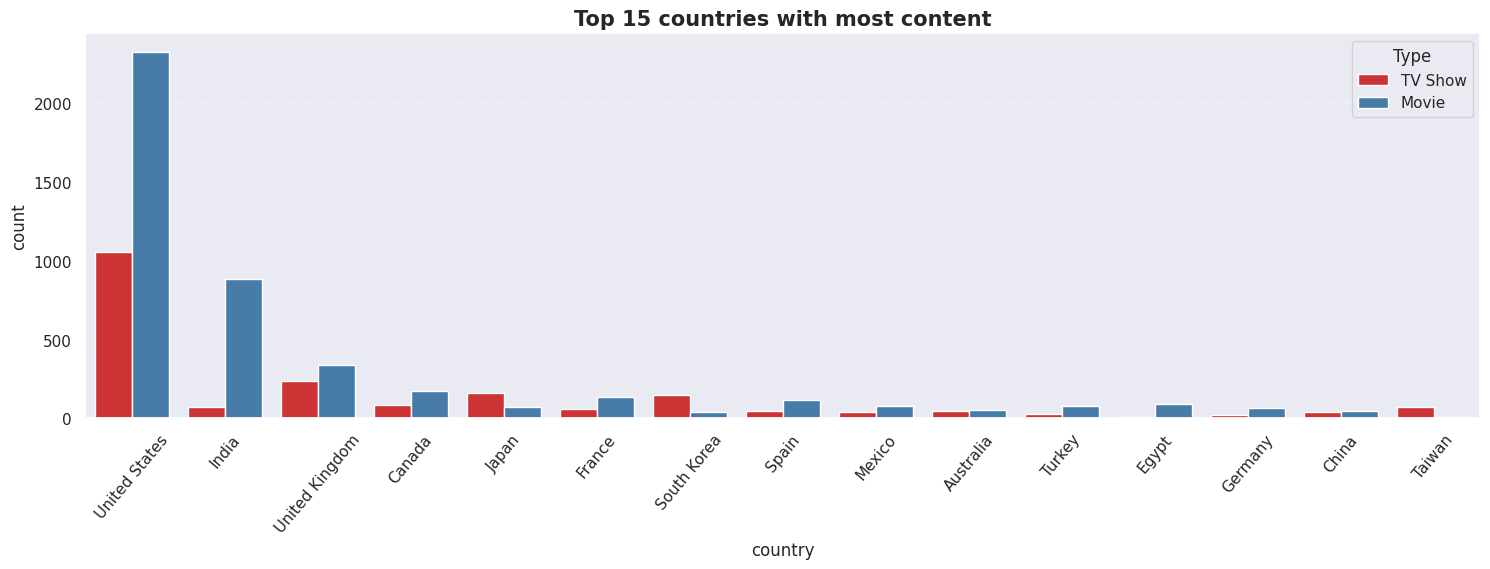

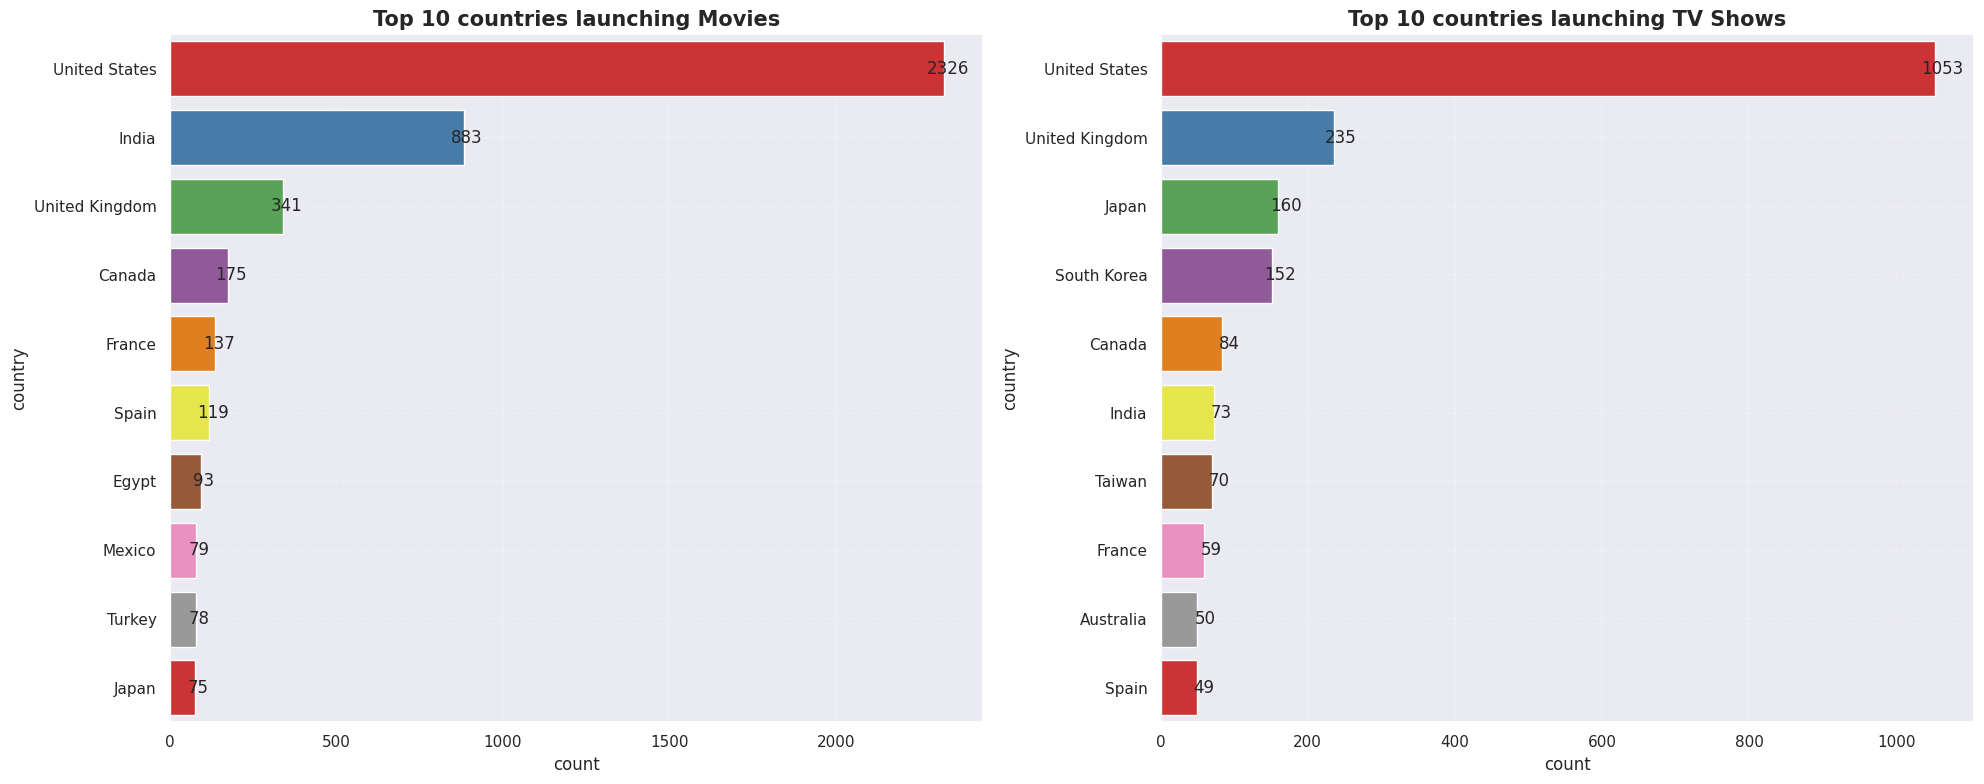

In [38]:
# Chart - 13 visualization code

plt.figure(figsize=(18, 5))
plt.grid(linestyle='--', linewidth=0.3)

# Top 15 countries with most content
top_countries = df['country'].value_counts().index[:15]
sns.countplot(x = df['country'], order = top_countries, hue = df['type'], palette="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most content', fontsize = 15, fontweight = 'bold')
plt.legend(title = 'Type')

plt.figure(figsize=(20, 8))
df_movies = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']

for df, content_type in [(df_movies, 'Movies'), (df_tvshows, 'TV Shows')]:
    plt.subplot(1, 2, 1 if content_type == 'Movies' else 2)
    df_country = df['country'].value_counts().head(10).reset_index()
    df_country.columns = ['country', 'count']

    plots = sns.barplot(y = "country", x = 'count', data = df_country, palette = 'Set1')
    plt.title(f'Top 10 countries launching {content_type}', fontsize = 15, fontweight = 'bold')
    plt.grid(linestyle='--', linewidth=0.3)
    for i, value in enumerate(df_country['count']):
        plots.text(value + 10, i, str(value), ha = 'center', va = 'center')

plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?


Top 15 Countries with Most Content - Countplot (Bar Chart): The first chart uses a countplot to show the distribution of content (Movies and TV Shows) among the top 15 countries with the most content on Netflix. This chart helps us understand which countries contribute the most to Netflix's content library and allows for a quick comparison of the content types within those countries.

Top 10 Countries Launching Movies Back to Back - Bar Chart: In this chart, we use a bar chart to visualize the top 10 countries that have the highest number of movies released back to back. This helps identify which countries have a consistent flow of movie releases, which can provide insights into production trends and potential partnerships with those countries.

#### 2. What is/are the insight(s) found from the chart?

The United States is the clear leader in terms of content production, both for TV shows and movies. It produces more than twice as many TV shows as the runner-up, the United Kingdom, and more than 3 times as many movies as India, the second-place finisher.

India is the second-largest producer of TV shows, and it is also the fastest-growing market for content consumption. The growth of the Indian entertainment industry is being driven by a number of factors, including the increasing popularity of streaming services, the growing middle class, and the rising disposable incomes of Indians.

South Korea is a major player in the global TV show market, and it is known for its popular dramas and comedies. The Korean Wave, a term used to describe the global popularity of Korean culture, has helped to boost the visibility of South Korean TV shows around the world.

Canada is a major producer of TV shows, and it is home to many popular series, such as "Schitt's Creek" and "The Handmaid's Tale". The Canadian government provides financial support for the production of TV shows, which helps to attract foreign investment and create jobs.

### Chart - 14: Which Genres are Popular in Netflix?

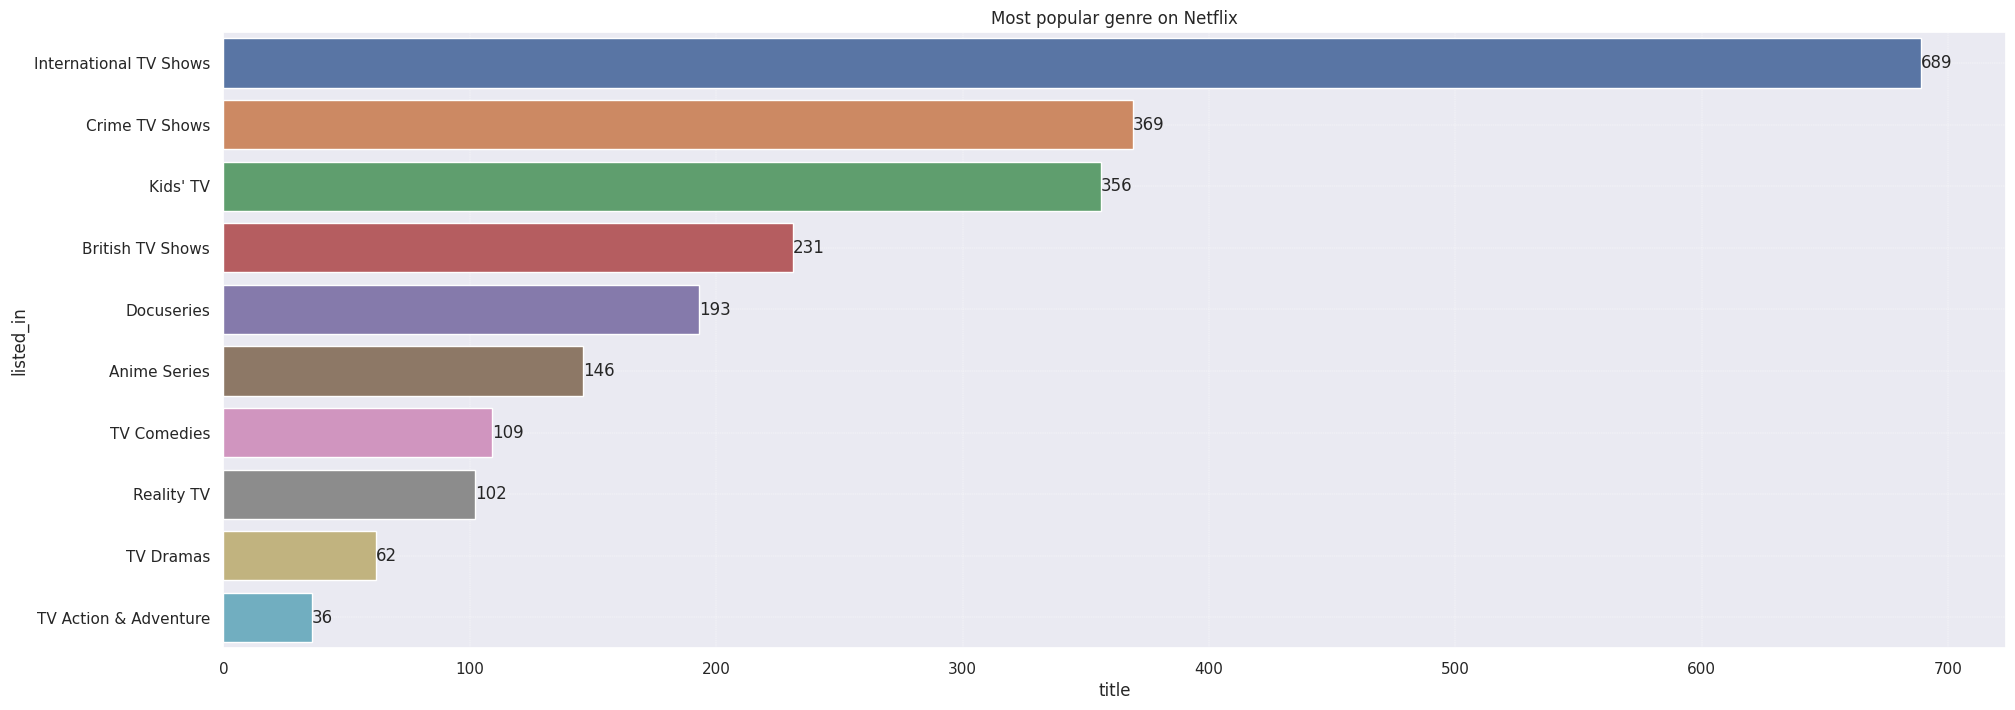

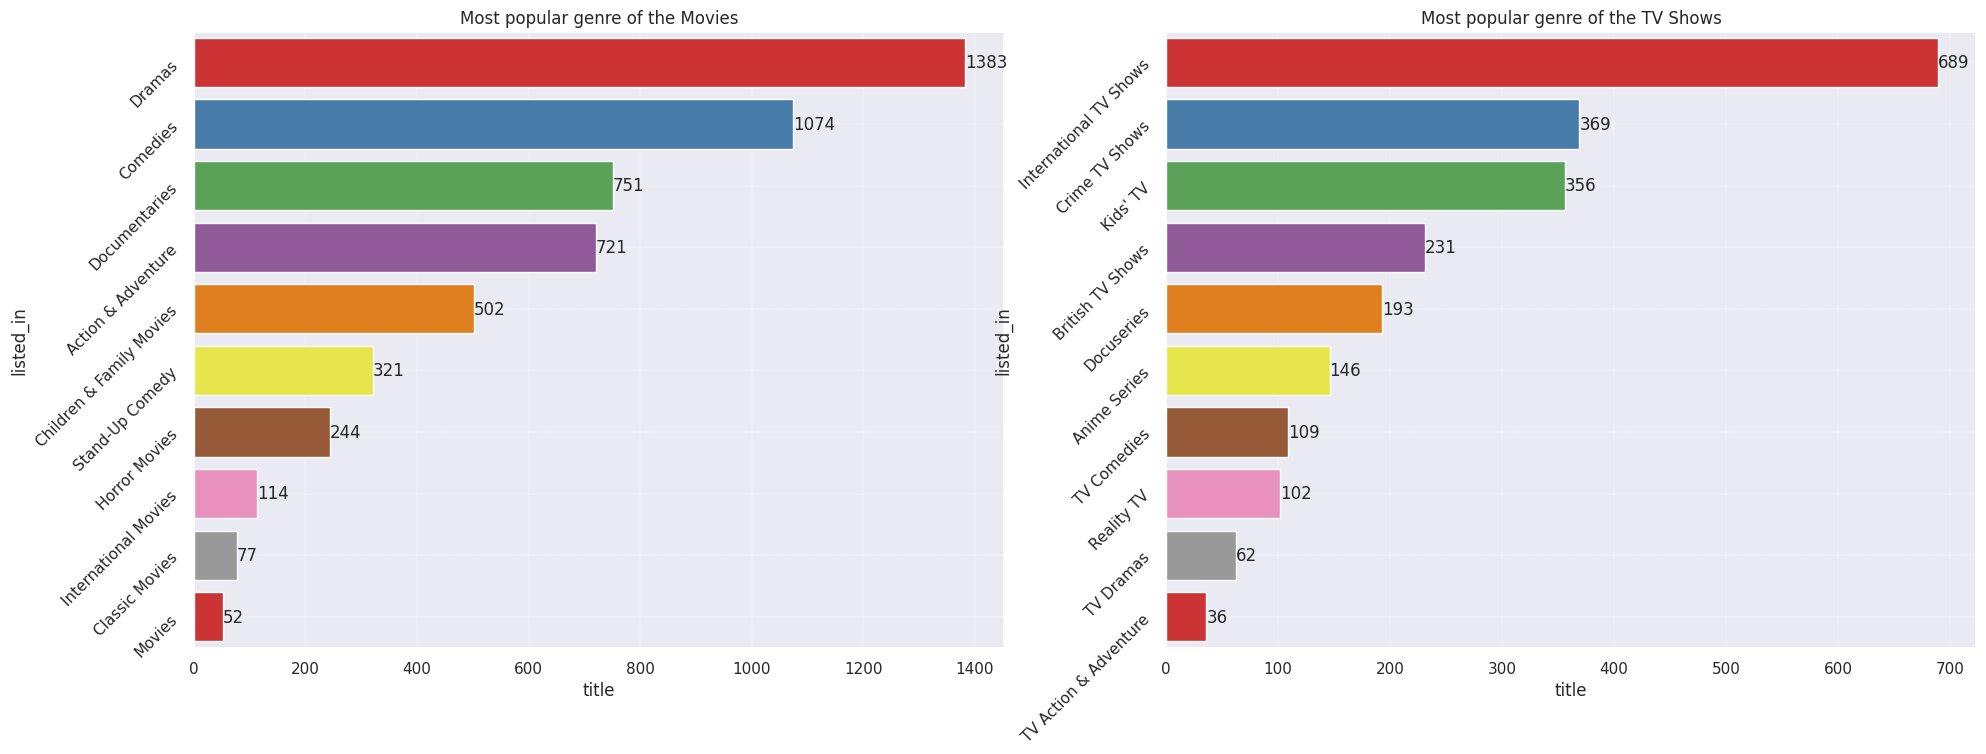

In [39]:
# Chart - 14 visualization code

plt.figure(figsize = (23,8))
df_genre = df.groupby(['listed_in']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending = False)[:10]
plots= sns.barplot(y = "listed_in",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize = (23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['listed_in']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending = False)[:10]
  plots = sns.barplot(y = "listed_in",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle ='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

#### 1. Why did you pick the specific chart?

bar plots are a versatile choice for visualizing categorical data with clear rankings and comparisons, making them suitable for conveying insights about the most popular genres on Netflix.

#### 2. What is/are the insight(s) found from the chart?

The most popular genre in TV shows is international TV shows. This suggests that viewers are interested in watching content from different cultures and countries. This could be due to the increasing globalization of the world, as well as the rise of streaming services that offer a wide variety of content from around the world.
Crime TV shows are also popular, ranking second in the list. This could be because crime is a universal theme that appeals to viewers of all ages. Crime TV shows can also be suspenseful and exciting, which can keep viewers hooked.
Kids' TV is another popular genre. This is not surprising, as children are naturally drawn to stories and characters that they can relate to. Kids' TV shows can also be educational, which can help children learn about different topics.
British TV shows are also popular, ranking fourth in the list. This could be because British TV shows are known for their high quality and originality. British TV shows have also won numerous awards, which can help to attract viewers.

### Chart - 15: Total Number of Movies/TV Shows added per month on Netflix.

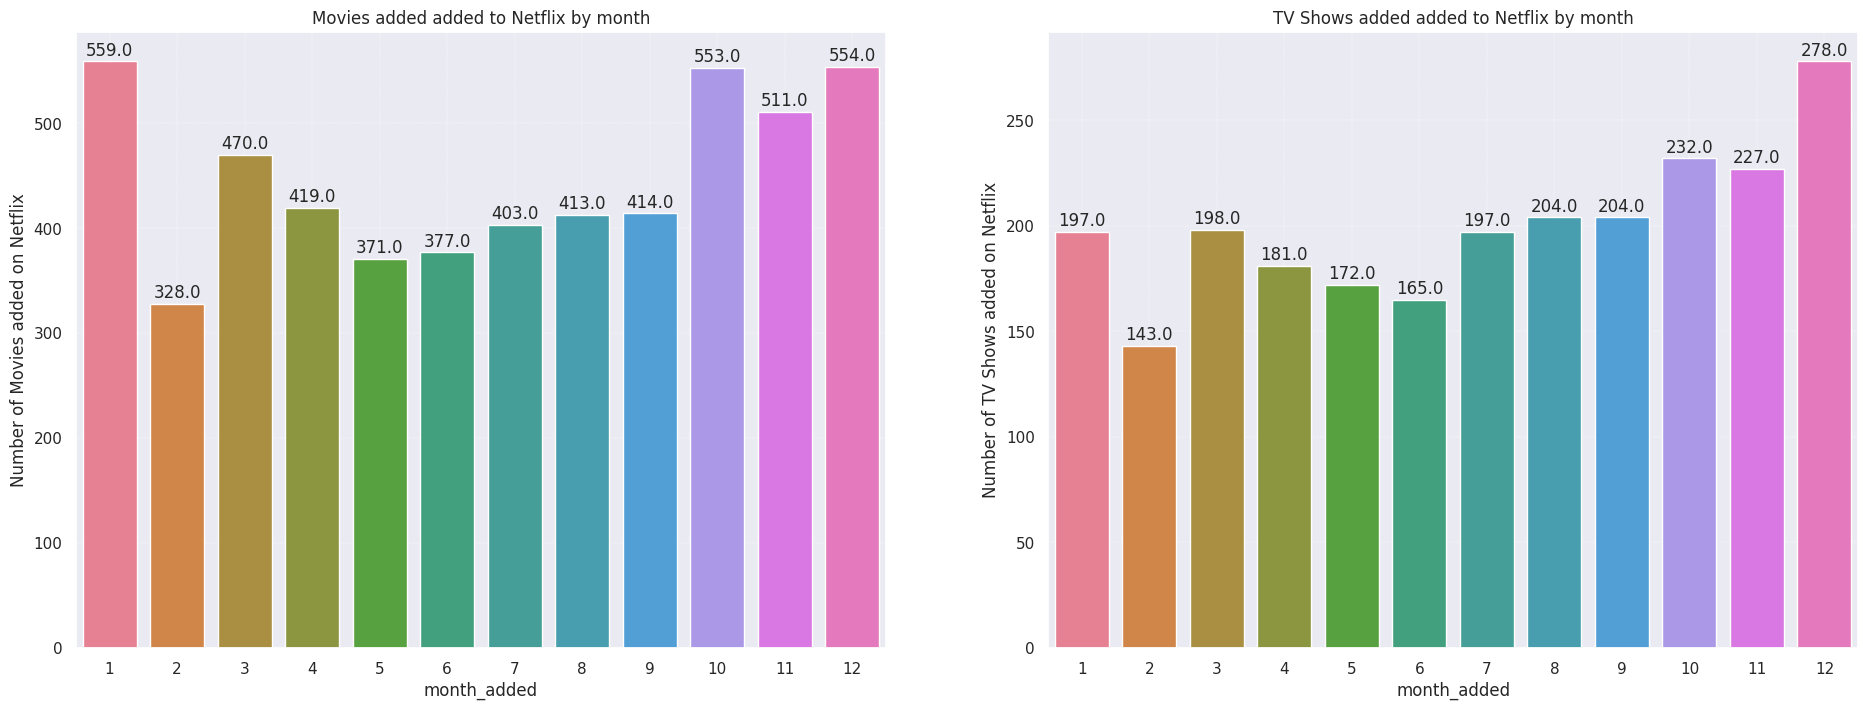

In [40]:
plt.figure(figsize = (23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by = ['month_added'],ascending = False)
  plots = sns.barplot(x = 'month_added',y = 'title', data = df_month, palette = 'husl')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va = 'center',
                    size = 12, xytext = (0, 8),
                    textcoords='offset points')
plt.show()

#### 1. Why did you pick the specific chart?

We have plotted this graph to know in which month the movie/tv shows added is maximum and in which year minimum.



#### 2. What is/are the insight(s) found from the chart?

We found that October, November and December are the most popular months for TV shows addition.

January, October and December are the most popular months for movie addition.

February is the least popular month for the movies and TV shows to be added on Netflix.

### Chart - 16: What is the Distribution of Duration of contents over Netflix?

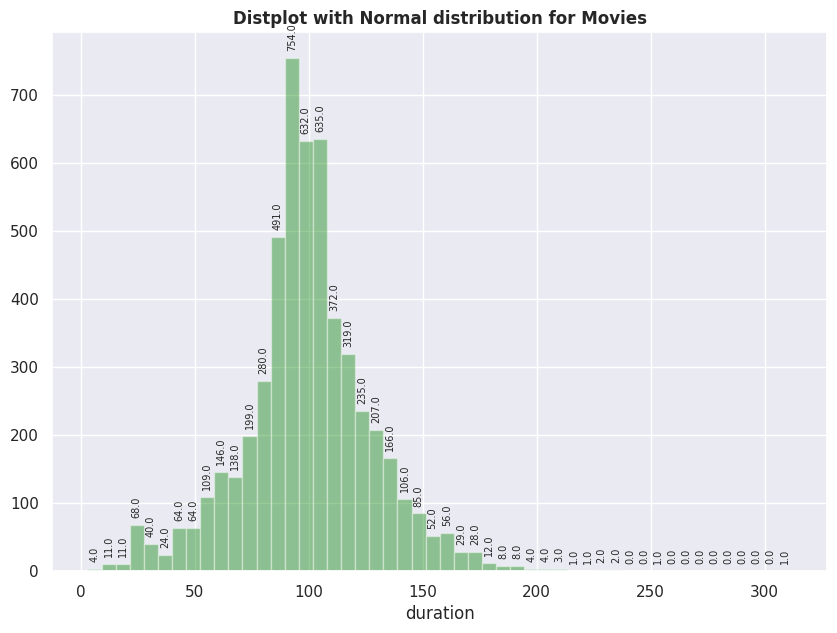

In [41]:
#Checking the distribution of Movie Durations
plt.figure(figsize = (10,7))
plots = sns.distplot(df_movies['duration'],kde = False, color = ['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight = "bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha = 'center', va = 'bottom',
                  size=7, xytext=(0, 5),
                  textcoords = 'offset points', rotation = 90)
plt.show()

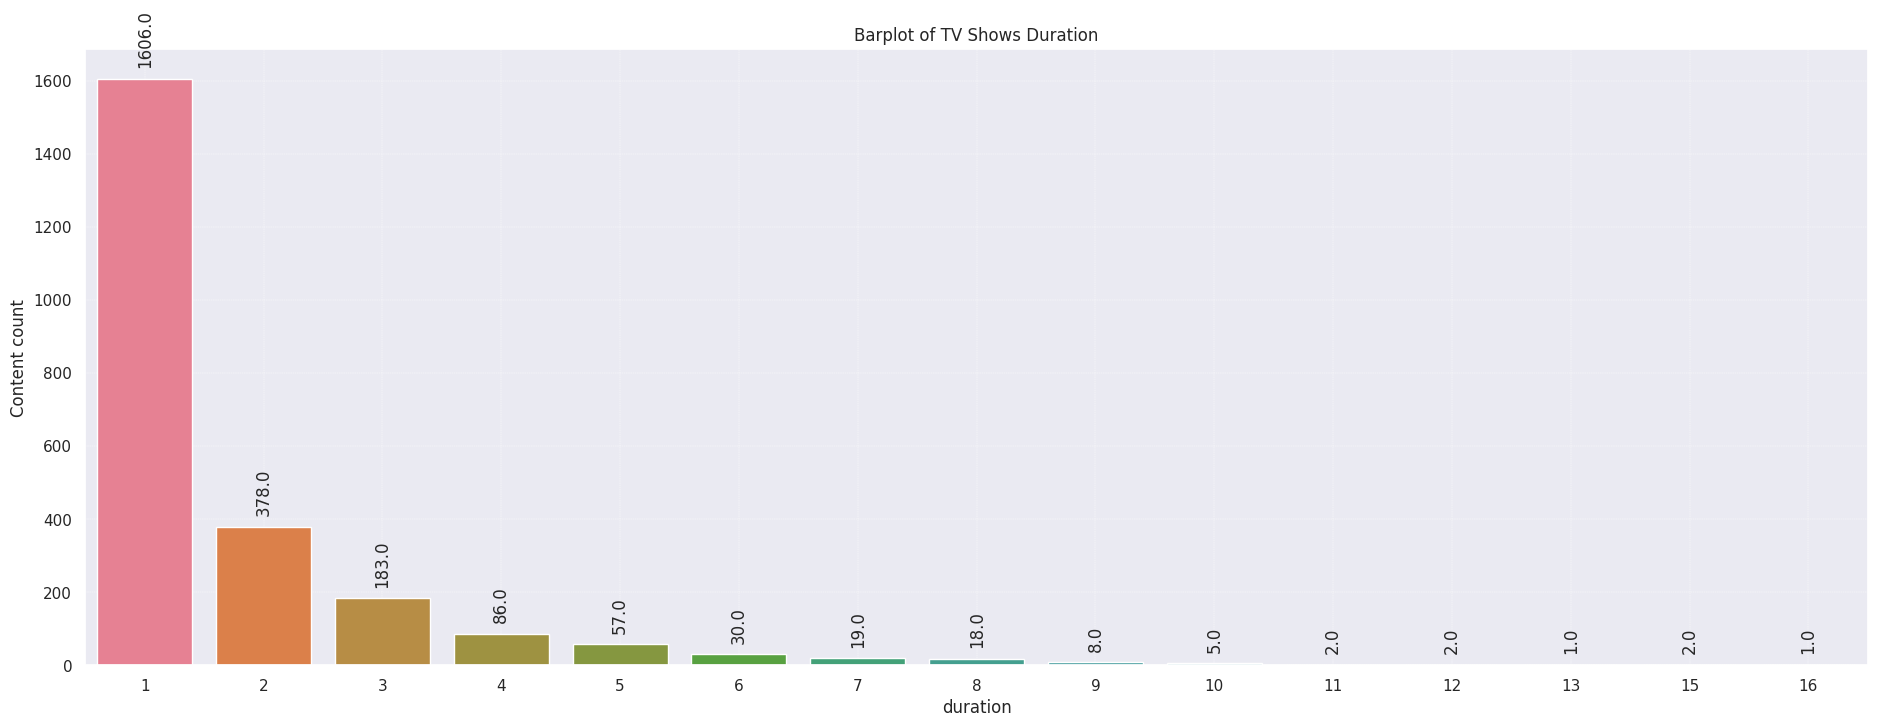

In [42]:
plt.figure(figsize = (23,8))
df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by = ['duration'],ascending = False)
plots= sns.barplot(x = 'duration',y = 'title', data = df_duration, palette = 'husl')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle = '--', linewidth = 0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha = 'center', va = 'bottom',
                  size = 12, xytext = (0, 8),
                  textcoords = 'offset points', rotation = 90)
plt.show()

#### 1. Why did you pick the specific chart?

To know the duration distribution for Movies and TV Shows on Netflix.

#### 2. What is/are the insight(s) found from the chart?

1.The histogram of the distribution of movie durations in minutes on Netflix shows that the *majority of movies on Netflix have a duration between 80 to 120 minutes. *

2.The countplot of the distribution of TV show durations in seasons on Netflix shows that the most common duration for TV shows on Netflix is one season, followed by two seasons.

## **5. Hypothesis Testing**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1:

Null Hypothesis: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

Alternative Hypothesis: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

Hypothetical Statement 2:

Null Hypothesis: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

Alternative Hypothesis: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

Hypothetical Statement 3:

Null Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

Alternative Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

Alternative Hypothesis: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['listed_in'].str.contains('Dramas') | df['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  -5.082937862097227
p-value:  3.71641307932139e-07
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.

##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

Alternative Hypothesis: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -0.5122738560776298
p-value:  0.6141075339119706
Failed to reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

Alternative Hypothesis: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  0.5034927744989615
p-value:  0.6146178591116077
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.



##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
''' we already done this in data wrangling for getting a good visualization '''

' we already done this in data wrangling for getting a good visualization '

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values in the director, cast, and country attributes can be replaced with string 'unknown' and 'No Cast'.
Small amount of null value percentage present in rating and date_added column, if we drop these nan values in date_added column and replace nan value in rating with mode values it will not affect that much while building the model. So, we simply drop the nan value present in date_added columns.

### 2. Handling Outliers

<Axes: >

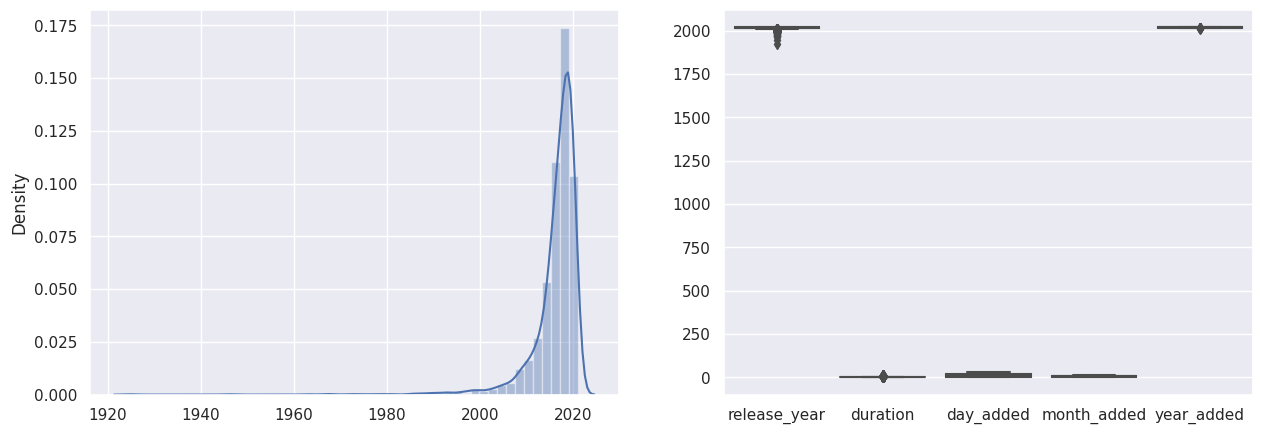

In [47]:
# Handling Outliers & Outlier treatments
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x = df['release_year'], ax=ax[0])
sns.boxplot(data = df, ax=ax[1])

#### What all outlier treatment techniques have you used and why did you use those techniques?

- Since, the almost all of the data present in textual format except release year.
- The data that we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier.

### 3. Textual Data Preprocessing

#### 1. Textual Columns

In [48]:
#drop unnecessary columns
columns_to_drop = [ 'month_added', 'day_added', 'year_added']
df.drop(columns=columns_to_drop, inplace=True)

In [49]:
# Creating new feature content_detail with the help of other textual attributes
df["content_detail"] = df["cast"]+" "+df["director"]+" "+df["listed_in"]+" "+df["type"]+" "+df["rating"]+" "+df["country"]+" "+df["description"]

#checking the manipulation
df.head(5)

show_id     type   title              director  \
0       s1  TV Show      3%               Unknown   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983               Unknown   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09               Unknown   

                                                 cast        country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...         Poland   
12                                            Unknown         Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...  United States   

    release_year        rating  duration               listed_in  \
0           2020        Adults         4  International TV Shows   
5           2016        Adults         1  International TV Shows   
11          2018        Adults         1          Crime TV Shows   
12          2019        Adults         1          Crime TV Shows   
16          2018  Young Adults         1  International TV Shows   

                                          description  \
0   In a future where the elite inhabit an island ...   
5   A genetics professor experiments with a treatm...   
11  In this dark alt-history thriller, a naïve law...   
12  Archival video and new interviews examine Mexi...   
16  As a psychology professor faces Alzheimer's, h...   

                                       content_detail  
0   João Miguel, Bianca Comparato, Michel Gomes, R...  
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...  
11  Robert Więckiewicz, Maciej Musiał, Michalina O...  
12  Unknown Diego Enrique Osorno Crime TV Shows TV...  
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...

#### 2. Lower Casing

In [50]:
# Lower Casing
df['content_detail'] = df['content_detail'].str.lower()

# Checking the manipulation
df.iloc[281,]['content_detail']

'unknown picky talarico docuseries tv show adults united states soda stereo, café tacvba, aterciopelados and others figure in this 50-year history of latin american rock through dictatorships, disasters and dissent.'

#### 3. Removing Punctuations

In [51]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [52]:
# Removing Punctuations from the content_detail
df['content_detail'] = df['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df.iloc[281,]['content_detail']

'unknown picky talarico docuseries tv show adults united states soda stereo café tacvba aterciopelados and others figure in this 50year history of latin american rock through dictatorships disasters and dissent'

#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [54]:
# Remove URLs & Remove words and digits contain digits
df['content_detail'] = df['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df.iloc[281,]['content_detail']

'unknown picky talarico docuseries tv show adults united states soda stereo caf  tacvba aterciopelados and others figure in this   year history of latin american rock through dictatorships disasters and dissent'

#### 5. Removing Stopwords & Removing White spaces

In [55]:
# Downloading stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# create a set of English stop words
stop_words = set(stopwords.words('english'))

# displaying stopwords
print(stop_words)

{'than', 'you', 'were', 'other', 'out', "don't", "she's", "shouldn't", 'theirs', 'or', 'each', 'd', 'through', 'in', 'no', 't', 'hadn', 'isn', 'not', 'they', 'm', 'll', 'she', 'by', 'mightn', 'with', 'mustn', 'down', 'didn', 'is', 'above', 'of', "haven't", "mightn't", 'because', 'haven', 'that', 'do', 'up', "hadn't", 'there', "weren't", 'wouldn', 'ours', "you'd", 'until', 'both', 'whom', 'to', 'o', 'once', 'ourselves', 'his', 's', "didn't", 'should', 'how', 'having', "wouldn't", "won't", 'this', 'its', 'had', 'will', 'was', 'me', 'won', 'shouldn', 'him', 'further', 'are', 'any', 'your', 'only', 'where', 'can', 'just', 'for', 'on', 'before', "isn't", 'under', 'yourself', 'did', 'am', 'too', 'again', 'hasn', 'most', 'when', 're', 'who', 'we', 'ain', 'off', 'wasn', 'be', 'been', 'why', 'my', 'doesn', 'more', 'here', 'itself', 'ma', "wasn't", 'some', 'over', 'the', 'below', 'as', 'about', "you're", 'such', 'themselves', 'nor', "needn't", 'very', 'into', 'all', 'during', 'her', 'them', "are

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [57]:
# Remove URLs & Remove words and digits contain digits
df['content_detail'] = df['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df.iloc[281,]['content_detail']

'unknown picky talarico docuseries tv show adults united states soda stereo caf tacvba aterciopelados others figure year history latin american rock dictatorships disasters dissent'

In [58]:
df['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv show adults brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Tokenization

In [59]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df['content_detail'] = df['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['unknown',
 'picky',
 'talarico',
 'docuseries',
 'tv',
 'show',
 'adults',
 'united',
 'states',
 'soda',
 'stereo',
 'caf',
 'tacvba',
 'aterciopelados',
 'others',
 'figure',
 'year',
 'history',
 'latin',
 'american',
 'rock',
 'dictatorships',
 'disasters',
 'dissent']

#### 7. Text Normalization

In [60]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [61]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [62]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df['content_detail'] = df['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'unknown picky talarico docuseries tv show adult united state soda stereo caf tacvba aterciopelados others figure year history latin american rock dictatorship disaster dissent'

#### 8. Part of speech tagging

In [63]:
# tokenize the text into words before POS Taging
df['pos_tags'] = df['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df.head(5)

show_id     type   title              director  \
0       s1  TV Show      3%               Unknown   
5       s6  TV Show      46           Serdar Akar   
11     s12  TV Show    1983               Unknown   
12     s13  TV Show    1994  Diego Enrique Osorno   
16     s17  TV Show  Feb-09               Unknown   

                                                 cast        country  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...         Poland   
12                                            Unknown         Mexico   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...  United States   

    release_year        rating  duration               listed_in  \
0           2020        Adults         4  International TV Shows   
5           2016        Adults         1  International TV Shows   
11          2018        Adults         1          Crime TV Shows   
12          2019        Adults         1          Crime TV Shows   
16          2018  Young Adults         1  International TV Shows   

                                          description  \
0   In a future where the elite inhabit an island ...   
5   A genetics professor experiments with a treatm...   
11  In this dark alt-history thriller, a naïve law...   
12  Archival video and new interviews examine Mexi...   
16  As a psychology professor faces Alzheimer's, h...   

                                       content_detail  \
0   jo miguel bianca comparato michel gomes rodolf...   
5   erdal ik io lu yasemin allen melis birkan sayg...   
11  robert wi ckiewicz maciej musia michalina olsz...   
12  unknown diego enrique osorno crime tv show tv ...   
16  shahd el yaseen shaila sabt hala hanadi alkand...   

                                             pos_tags  
0   [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
5   [(erdal, JJ), (ik, NN), (io, NN), (lu, NN), (y...  
11  [(robert, NN), (wi, NN), (ckiewicz, NN), (maci...  
12  [(unknown, JJ), (diego, NN), (enrique, NN), (o...  
16  [(shahd, NN), (el, NN), (yaseen, JJ), (shaila,...

#### 9. Text Vectorization

In [64]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [66]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(2398, 22496)


### 4. Dimesionality Reduction


#### Do you think that dimensionality reduction is needed? Explain Why?


In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [67]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [5.90484504e-03 4.60423136e-03 3.63159951e-03 ... 2.05524220e-06
 1.46035400e-32 3.45462254e-36]


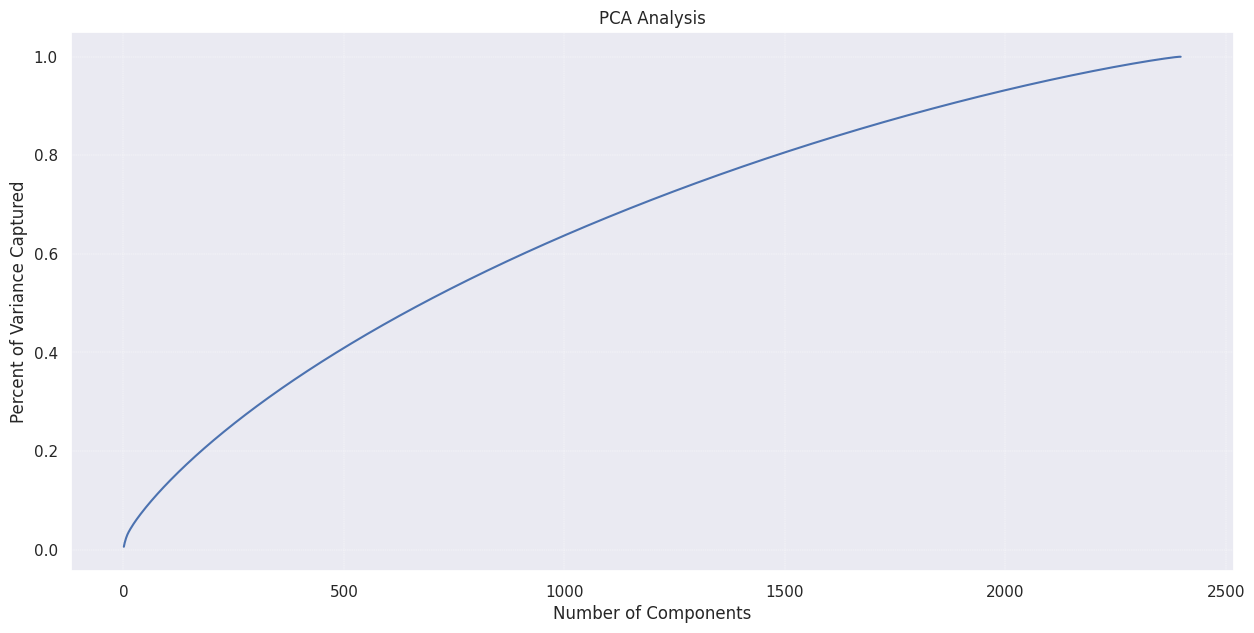

In [68]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [69]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(2398, 2088)

## **7. ML Model Implementation**

### ML Model - 1 (K-Means Clustering)

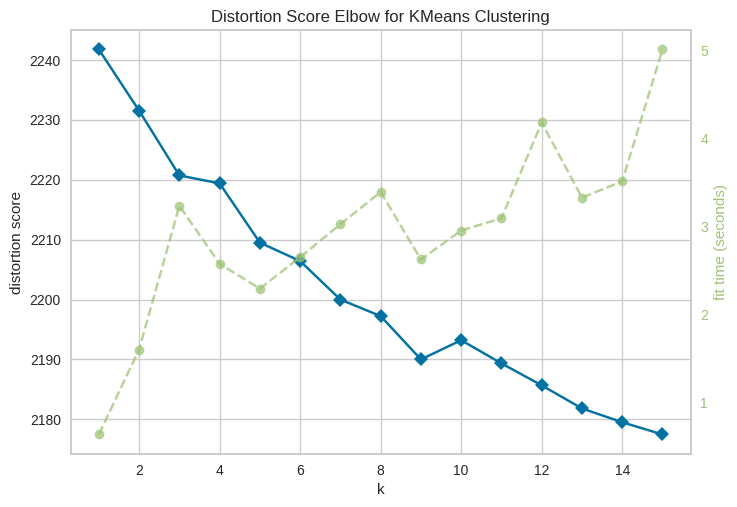

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,16),locate_elbow = False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is Silhouette Score?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

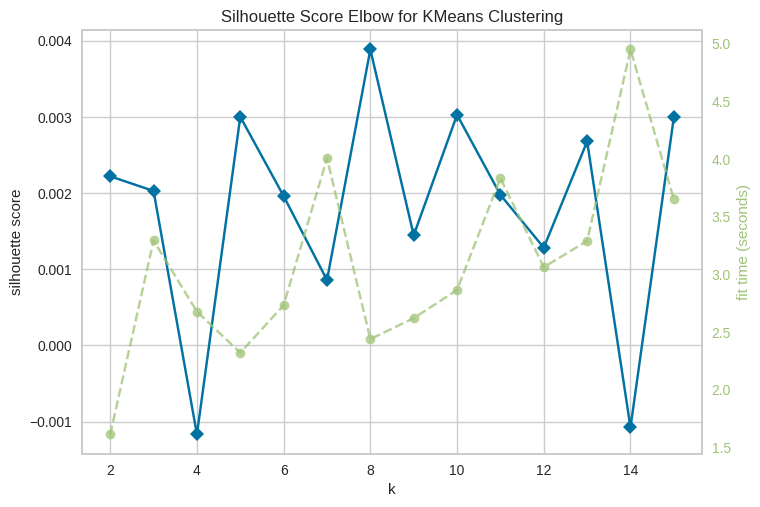

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [71]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [72]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.003119
k=3, Silhouette score=0.004242
k=4, Silhouette score=0.005253
k=5, Silhouette score=0.004665
k=6, Silhouette score=0.005655


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters

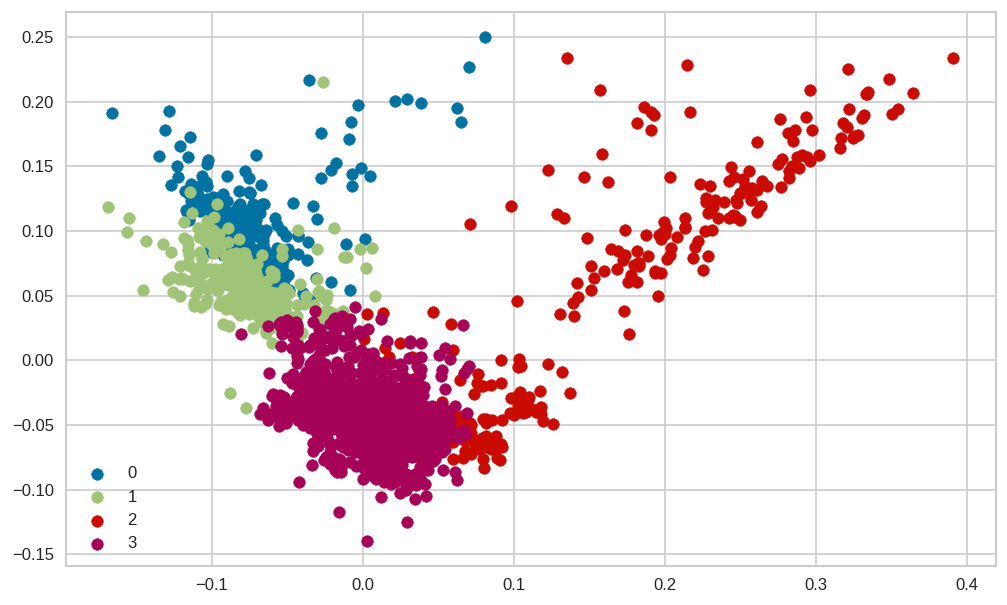

In [73]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 0)

#predict the labels of clusters.
plt.figure(figsize = (10,6), dpi = 120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

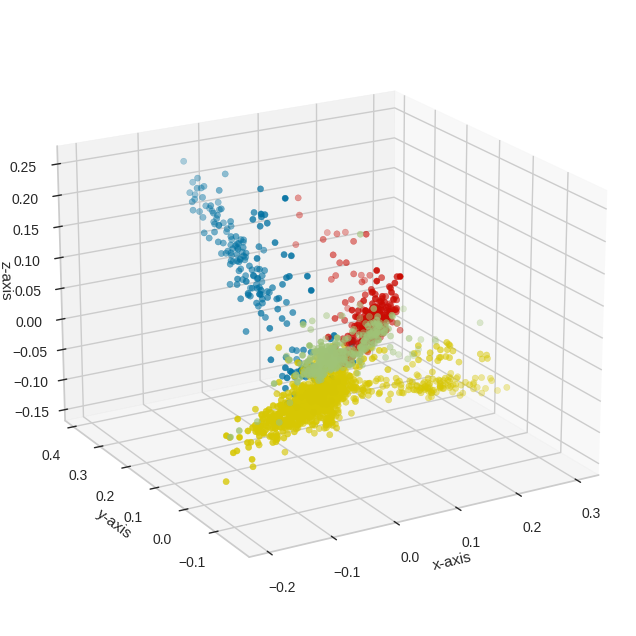

In [74]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev = 20, azim = -120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()


Cool, we can easily differentiate the all 4 clusters with naked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [75]:
#Add cluster values to the dateframe.
df['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [76]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

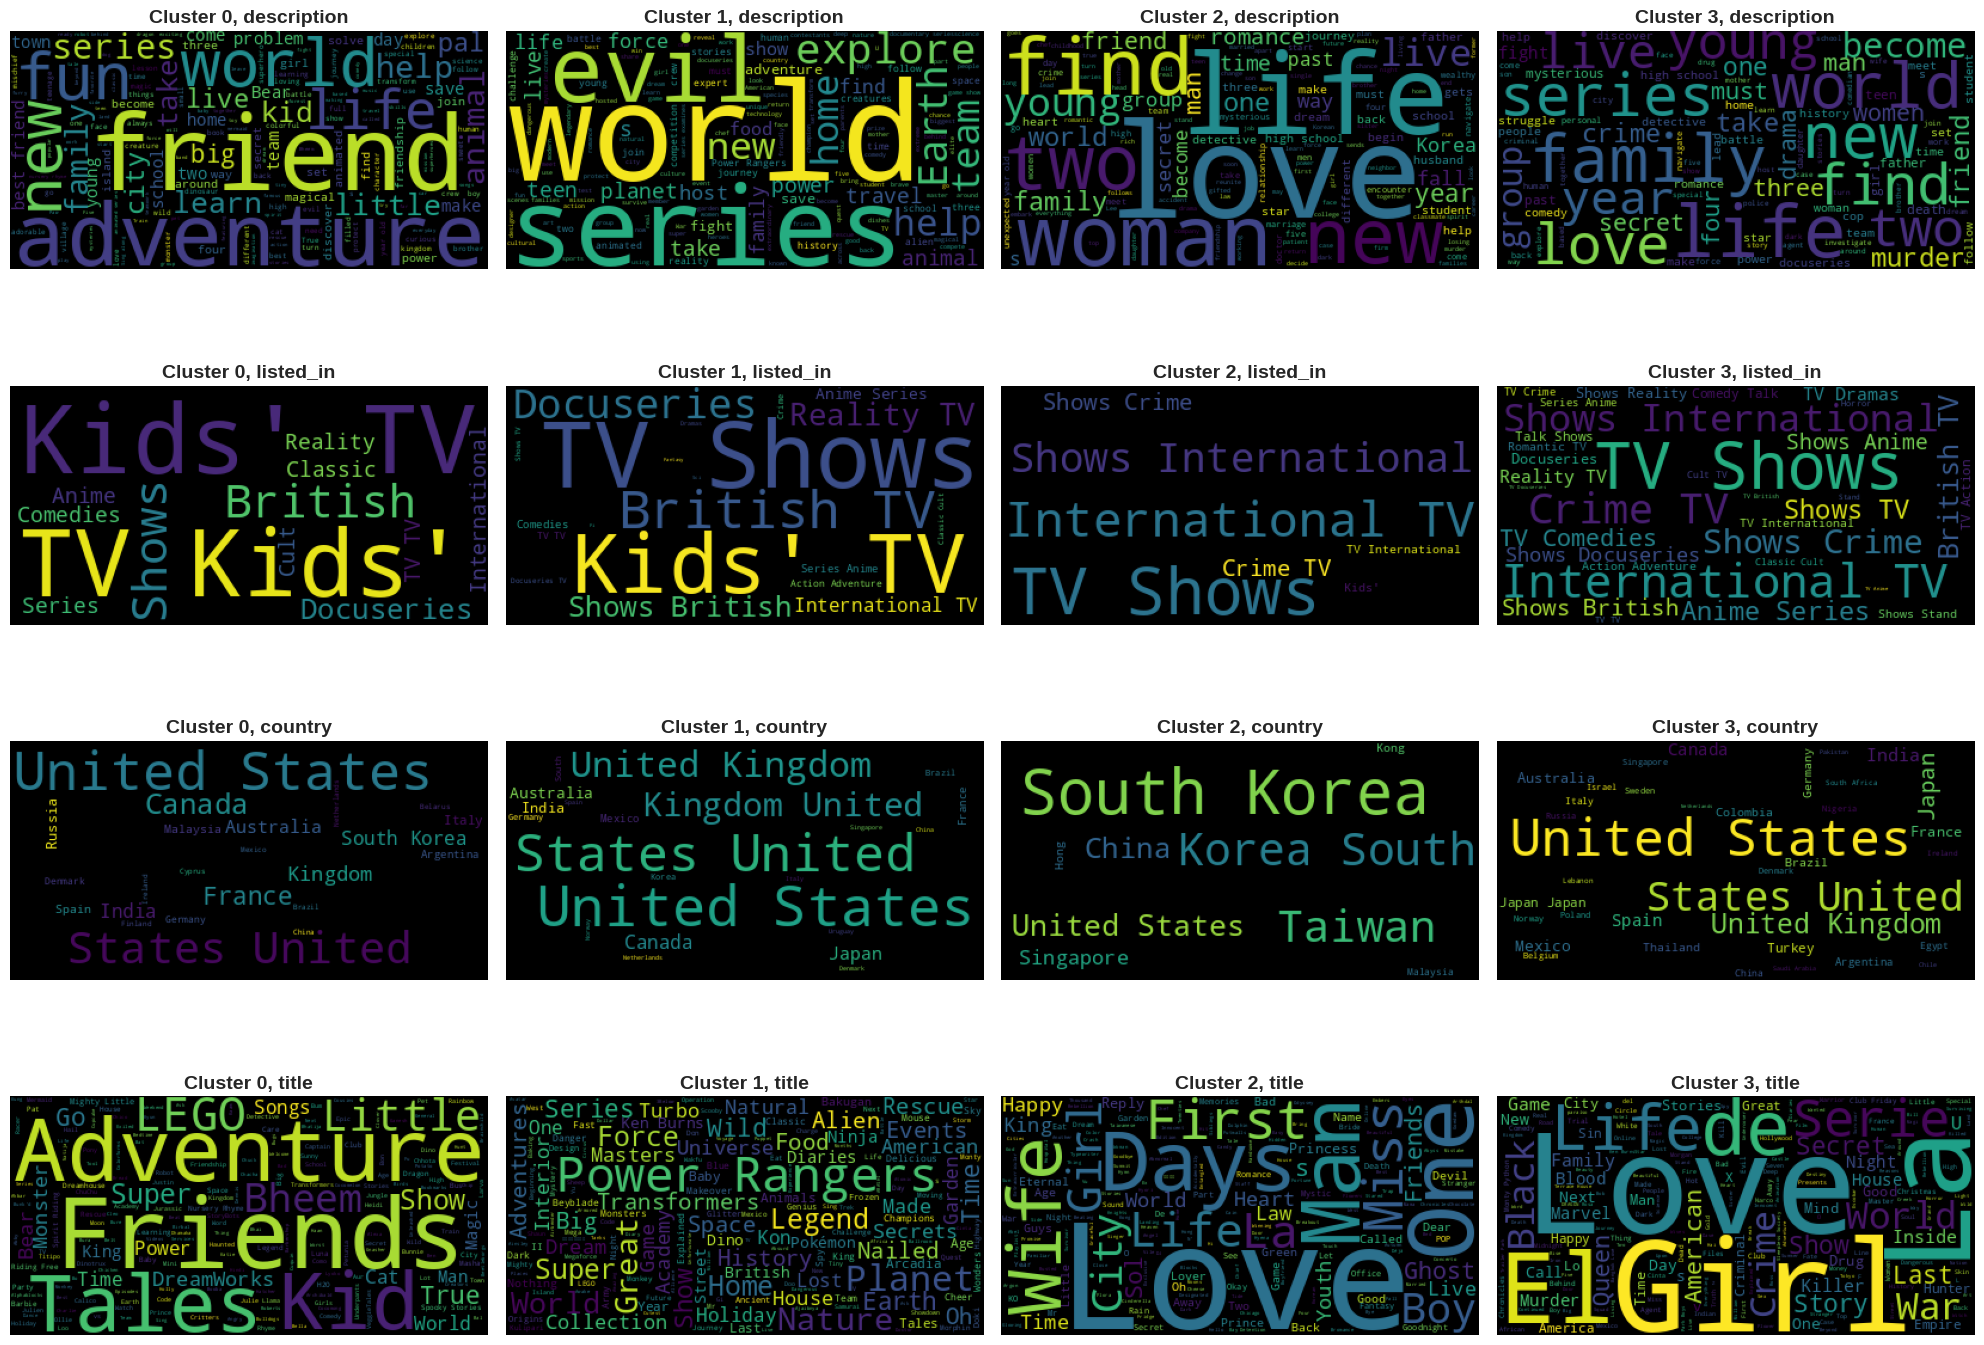

In [77]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 (Hierarchial Clustering)

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

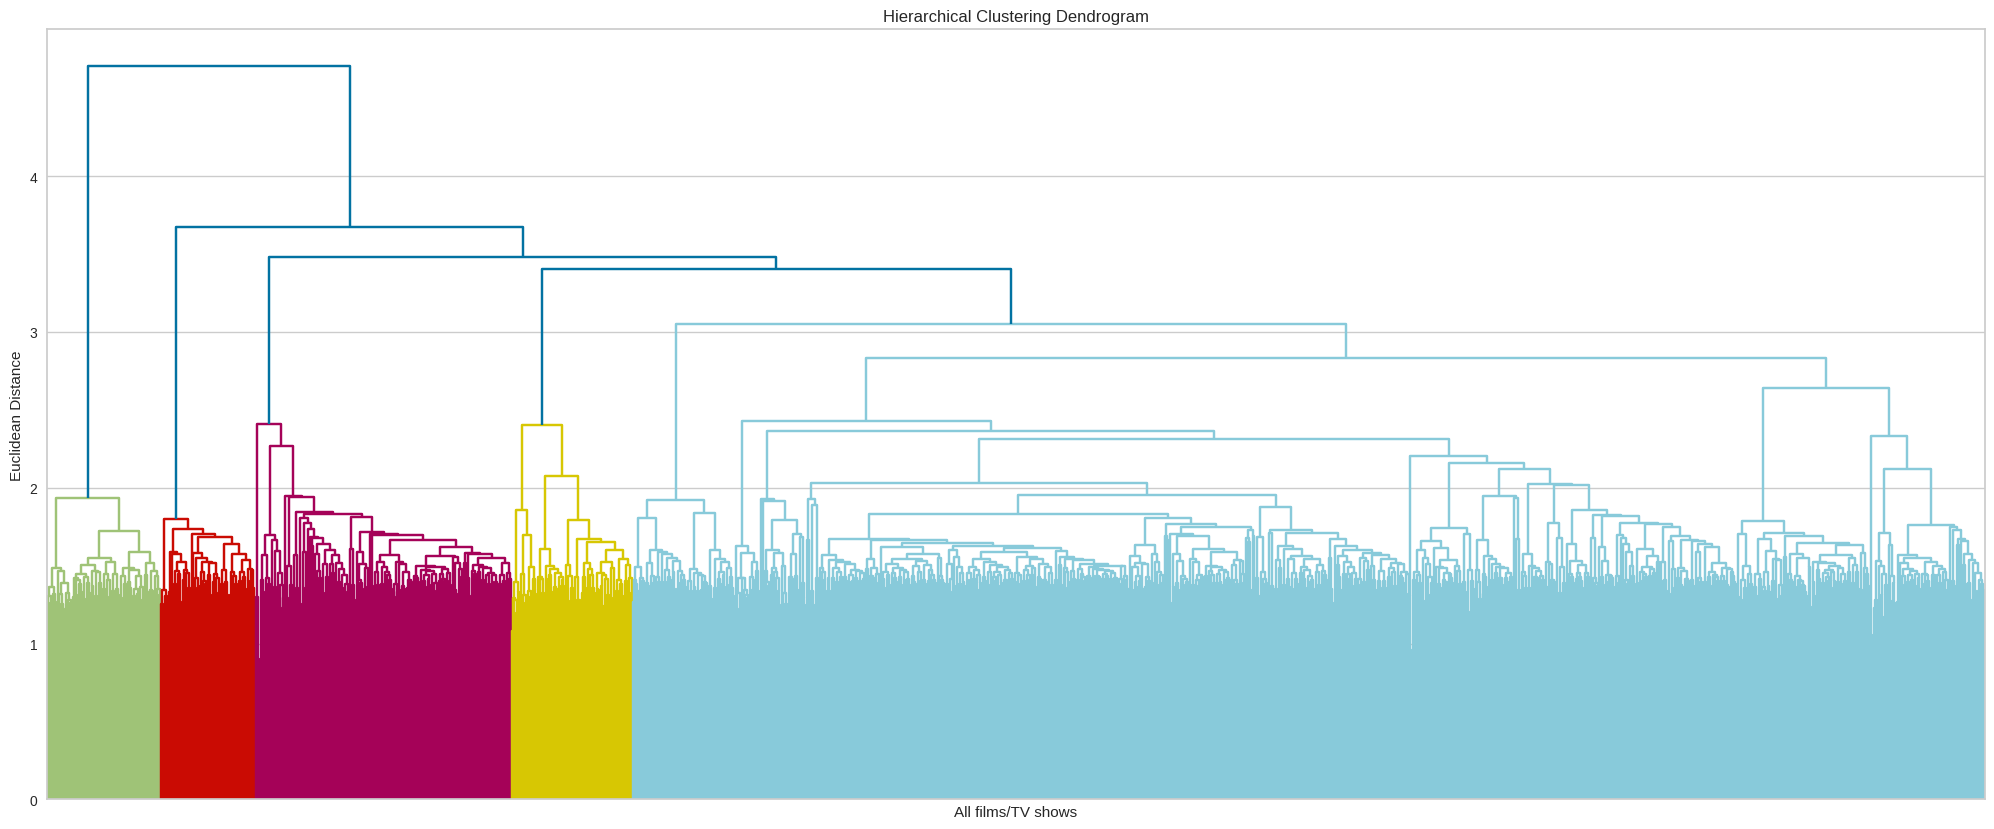

In [78]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

In [79]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.003014
k=3, Silhouette score=0.003896
k=4, Silhouette score=0.003403
k=5, Silhouette score=0.003951
k=6, Silhouette score=0.004530
k=7, Silhouette score=0.004456
k=8, Silhouette score=0.004353
k=9, Silhouette score=0.004214


From the above silhouette scores it is clear that the 2 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

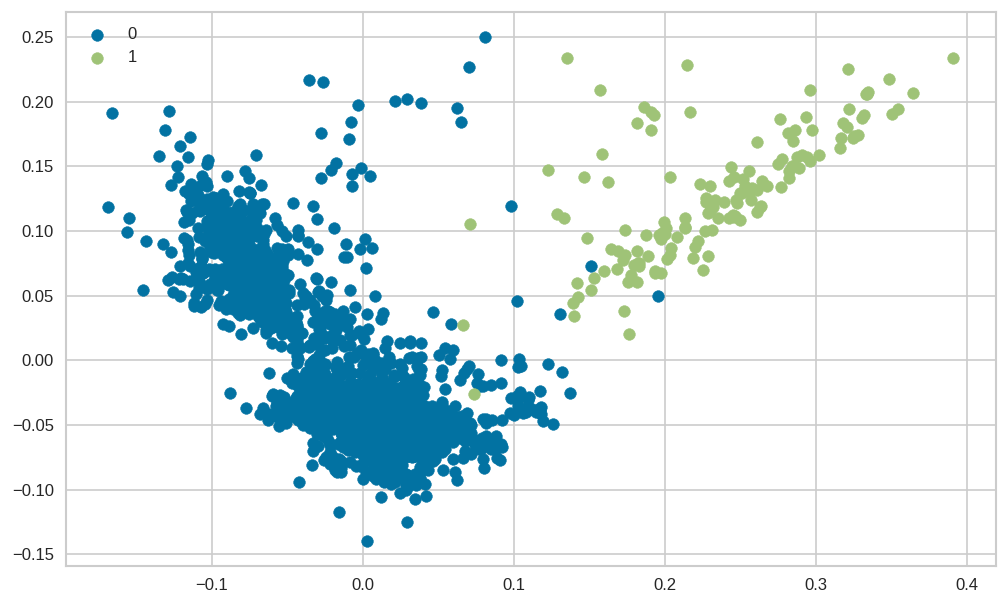

In [80]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize = (10,6), dpi = 120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Again plotting the 3 Dimensional plot to see the clusters clearly.

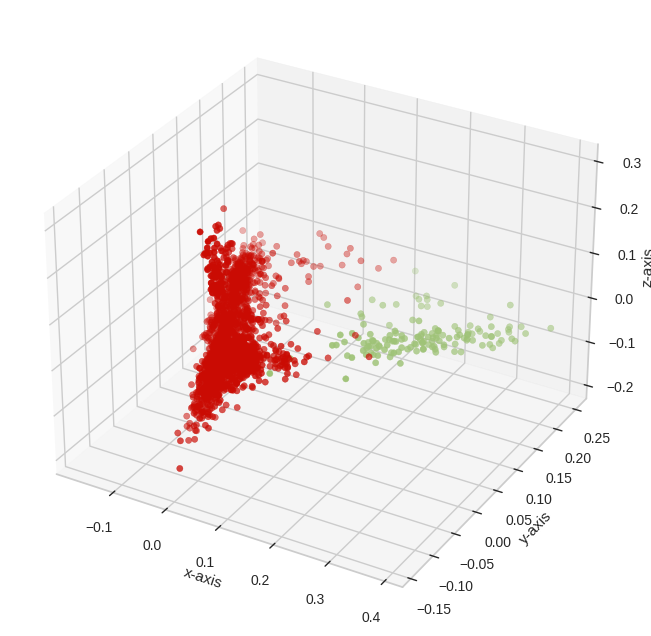

In [81]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can again easily differentiate the all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

In [82]:
# Add cluster values to the dateframe.
df['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [83]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

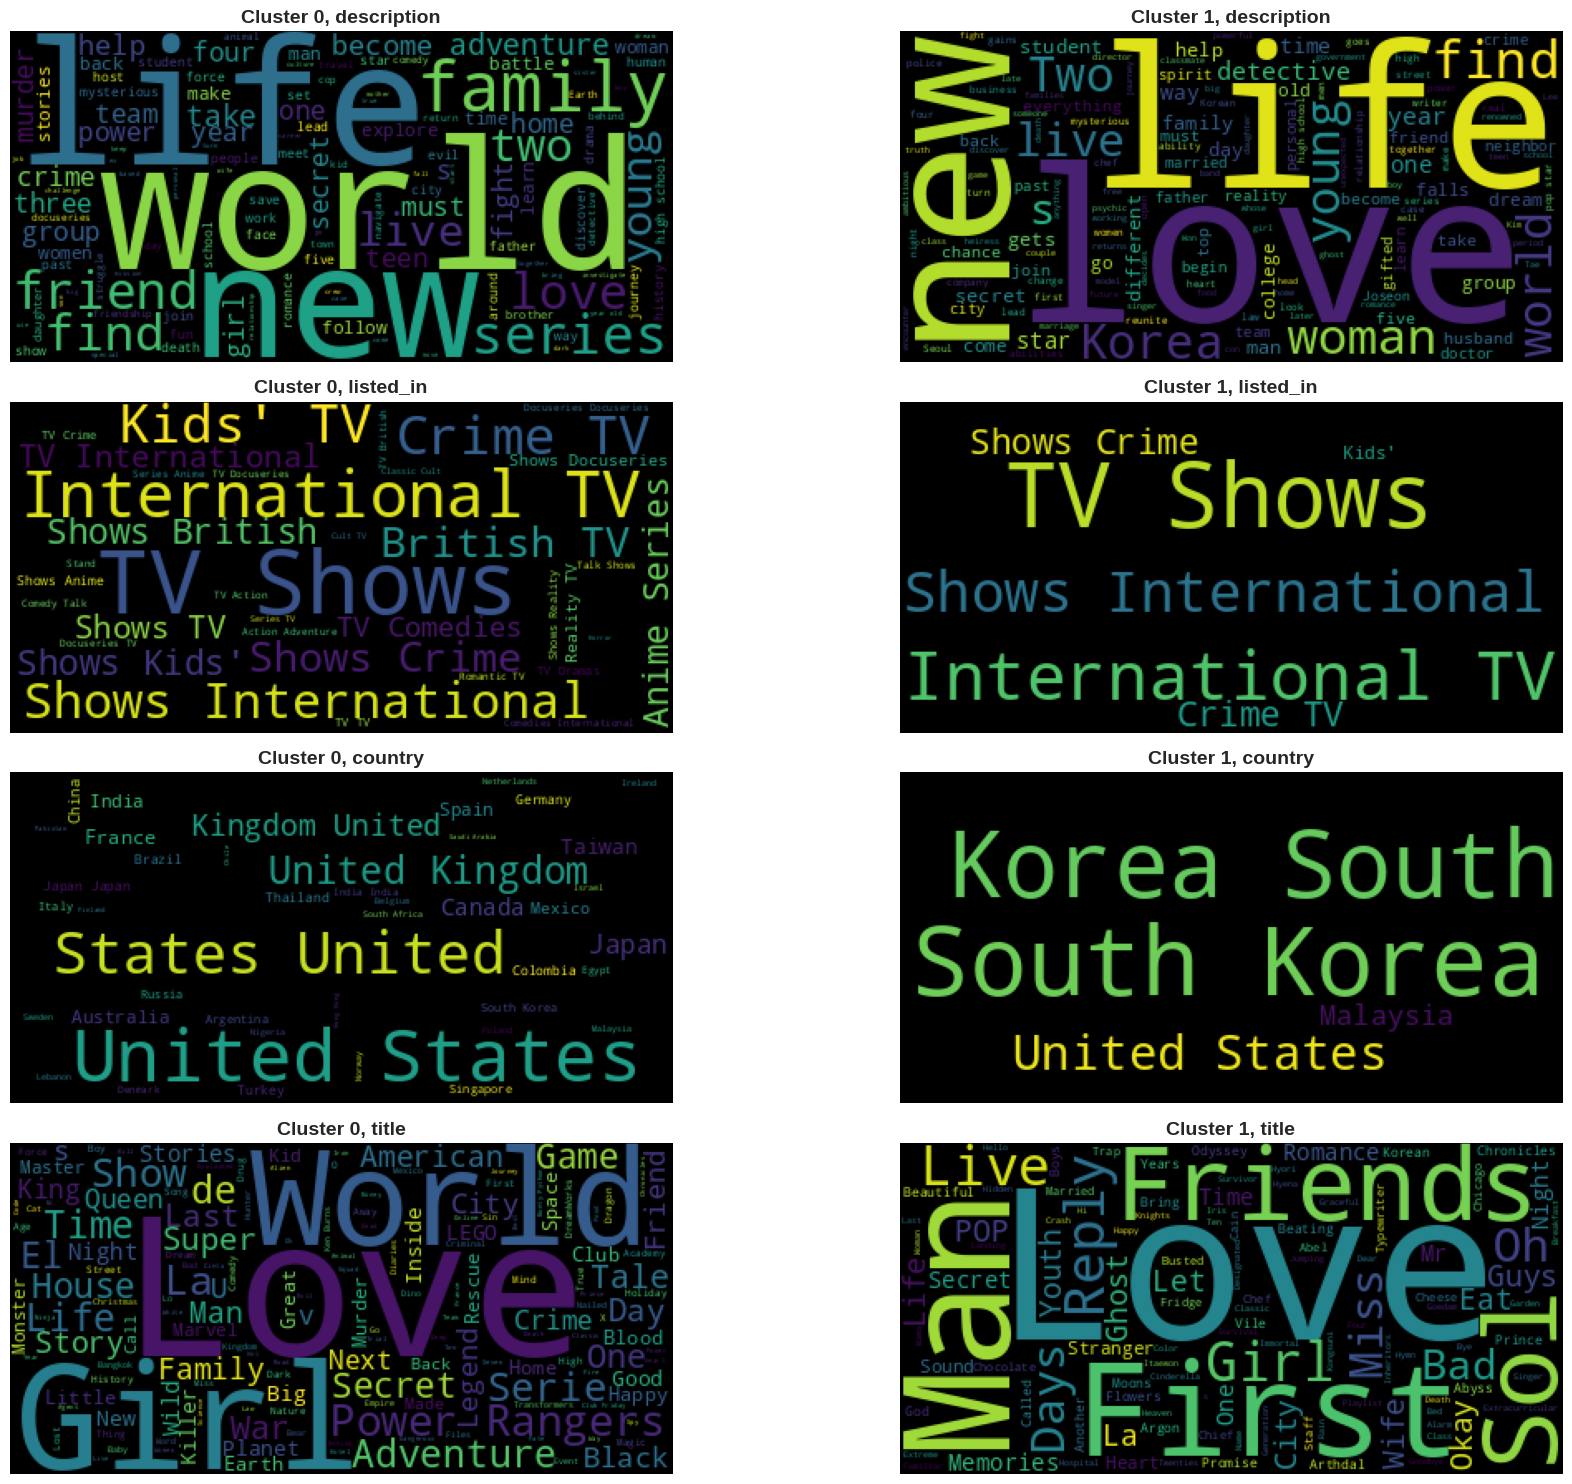

In [84]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 (Building a Recommendaton System)

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [87]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data = df):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* **Silhouette score is less sensitive to the shape of the clusters**, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

## **8. Future Work (Optional)**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [90]:
# Save the File
import joblib

# 'kmeans' is the best performing K-Means model
# Save the model to a file using joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [91]:
# Load the File and predict unseen data.
# Load the saved model
loaded_kmeans_model = joblib.load('kmeans_model.pkl')

## **Conclusion**

### **Conclusions drawn from EDA**

In conclusion, the exploratory data analysis (EDA) of Netflix's TV shows and movies clustering has revealed a wealth of insights that shed light on the platform's content distribution, production trends, viewer preferences, and global impact. From the data, several key takeaways emerge:

**Content Diversity and Global Reach:** Netflix's library showcases a rich diversity of content, with a focus on both TV shows and movies. The platform's international TV shows and the popularity of crime and kids' TV genres underscore the global audience's appetite for varied storytelling from different cultures and genres.

**Production Trends:** Over the years, Netflix has experienced rapid growth in content production. The surge in TV shows and movies from 2016 to 2020 reflects the streaming industry's evolving landscape, with platforms like Netflix responding to the demand for original content.

**Global Influences:** The dominance of the United States in content production highlights its historical and industrial strength, while the rise of Indian content underscores the influence of factors like growing middle-class populations, disposable incomes, and the popularity of streaming services.

**Regional Success Stories:** The prominence of South Korean dramas in the TV show market demonstrates the power of the Korean Wave, while Canada's financial support for TV shows has attracted both domestic and foreign investment.

**Viewer Engagement:** The popularity of Japanese voice actors, crime TV shows, kids' TV, British TV shows, and documentaries showcases viewers' diverse interests, from crime thrillers to educational content, across cultures and genres.

**Quality and Collaboration:** The involvement of prolific directors and actors suggests Netflix's emphasis on quality and collaboration, both within and beyond traditional entertainment industries.

In essence, the EDA illustrates Netflix's commitment to catering to a global audience by offering diverse, engaging, and high-quality content. The platform's strategic content production, collaborations with industry leaders, and focus on viewer preferences position it as a frontrunner in the evolving world of entertainment streaming.

### **Conclusions drawn from ML Model**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**, whereas for **Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***